CREDIT CARD FRAUD DETECTION PROJECT

In [ ]:
import numpy  as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc , roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso, LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve


Exploratory data analysis

In [37]:

#df = pd.read_csv('/content/creditcard.csv')
import pandas as pd

df = pd.read_csv('/content/creditcard.csv', on_bad_lines='skip')


In [38]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [39]:
df.shape

(23870, 31)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23870 entries, 0 to 23869
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    23870 non-null  int64  
 1   V1      23870 non-null  float64
 2   V2      23870 non-null  float64
 3   V3      23870 non-null  float64
 4   V4      23870 non-null  float64
 5   V5      23870 non-null  float64
 6   V6      23870 non-null  float64
 7   V7      23870 non-null  float64
 8   V8      23870 non-null  float64
 9   V9      23870 non-null  float64
 10  V10     23870 non-null  float64
 11  V11     23870 non-null  float64
 12  V12     23870 non-null  float64
 13  V13     23870 non-null  float64
 14  V14     23870 non-null  float64
 15  V15     23870 non-null  float64
 16  V16     23870 non-null  float64
 17  V17     23870 non-null  float64
 18  V18     23870 non-null  float64
 19  V19     23870 non-null  float64
 20  V20     23870 non-null  float64
 21  V21     23870 non-null  float64
 22

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23870 entries, 0 to 23869
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    23870 non-null  int64  
 1   V1      23870 non-null  float64
 2   V2      23870 non-null  float64
 3   V3      23870 non-null  float64
 4   V4      23870 non-null  float64
 5   V5      23870 non-null  float64
 6   V6      23870 non-null  float64
 7   V7      23870 non-null  float64
 8   V8      23870 non-null  float64
 9   V9      23870 non-null  float64
 10  V10     23870 non-null  float64
 11  V11     23870 non-null  float64
 12  V12     23870 non-null  float64
 13  V13     23870 non-null  float64
 14  V14     23870 non-null  float64
 15  V15     23870 non-null  float64
 16  V16     23870 non-null  float64
 17  V17     23870 non-null  float64
 18  V18     23870 non-null  float64
 19  V19     23870 non-null  float64
 20  V20     23870 non-null  float64
 21  V21     23870 non-null  float64
 22

In [41]:
df['Class'].value_counts()
#got which is fraud and ligit

,count
Class,
0.0,23769
1.0,100


Class
0.0    99.581047
1.0     0.418953
Name: Class, dtype: float64


<Axes: ylabel='Class'>

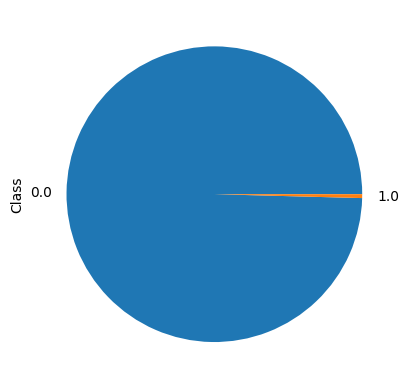

In [43]:
print((df.groupby('Class')['Class'].count()/df['Class'].count())*100)
((df.groupby('Class')['Class'].count()/df['Class'].count())*100).plot.pie()

#got percentage of fraud and ligid transaction

In [44]:
#derive percentage

classes = df['Class'].value_counts()
normal_share = classes[0]/df['Class'].count()*100
fraud_share = classes[1]/df['Class'].count()*100

print(normal_share)
print(fraud_share)

99.58104654572877
0.4189534542712305


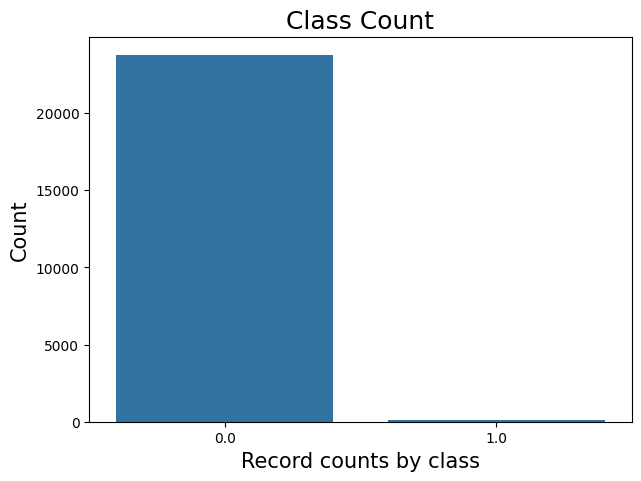

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.countplot(x='Class', data=df)
plt.title("Class Count", fontsize=18)
plt.xlabel("Record counts by class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()


In [47]:
#correlation check

# For each feature how it is corelated with other col ->or feature
#*****  (- is - corr + is +Corr)    large no then we will notunderstandcorrelation , so we will make heatmap
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.006926,-0.046182,-0.080600,0.003283,-0.082199,-0.041728,-0.046346,0.046115,-0.182699,...,0.015583,0.028311,-0.005370,-0.016469,0.063519,-0.042570,-0.005829,0.012723,0.040104,0.004029
V1,0.006926,1.000000,-0.304887,0.386679,-0.133634,0.160698,0.124471,0.300046,-0.140315,0.032801,...,-0.115324,0.036987,-0.060412,0.006039,0.171927,0.007844,-0.122737,0.072369,-0.186927,-0.297176
V2,-0.046182,-0.304887,1.000000,-0.387416,0.168303,-0.238372,-0.046683,-0.140351,0.080477,-0.091950,...,0.056087,-0.140415,-0.022470,-0.027460,-0.098689,-0.056331,0.150716,-0.076287,-0.455930,0.264943
V3,-0.080600,0.386679,-0.387416,1.000000,-0.220995,0.371041,0.059499,0.500674,-0.339756,0.227808,...,-0.021254,0.228446,0.049576,0.042143,-0.158120,0.048269,-0.198567,0.014955,-0.120151,-0.489019
V4,0.003283,-0.133634,0.168303,-0.220995,1.000000,-0.134277,-0.050188,-0.194163,0.114793,-0.150590,...,0.002604,-0.018998,-0.003541,-0.033705,-0.048485,0.055707,0.060282,-0.007609,0.116898,0.279869
V5,-0.082199,0.160698,-0.238372,0.371041,-0.134277,1.000000,0.172929,0.235055,-0.181280,0.040867,...,-0.068761,-0.065142,0.031349,0.004483,-0.063797,-0.038817,-0.110815,-0.053694,-0.309946,-0.269553
V6,-0.041728,0.124471,-0.046683,0.059499,-0.050188,0.172929,1.000000,0.086692,-0.098858,0.058096,...,0.055060,0.002922,-0.001939,0.022075,0.052237,0.011003,-0.067256,-0.025489,0.190935,-0.123127
V7,-0.046346,0.300046,-0.140351,0.500674,-0.194163,0.235055,0.086692,1.000000,-0.143453,0.082556,...,-0.103480,0.033441,0.066083,0.008515,-0.120888,-0.040187,-0.221756,-0.044384,0.243928,-0.421322
V8,0.046115,-0.140315,0.080477,-0.339756,0.114793,-0.181280,-0.098858,-0.143453,1.000000,-0.089941,...,-0.185929,0.067033,-0.105642,0.013162,0.039967,-0.009562,0.095885,0.049572,-0.048455,0.182763
V9,-0.182699,0.032801,-0.091950,0.227808,-0.150590,0.040867,0.058096,0.082556,-0.089941,1.000000,...,-0.018339,0.012367,-0.004704,0.005216,0.125217,0.005744,-0.076337,-0.068330,-0.018719,-0.188951


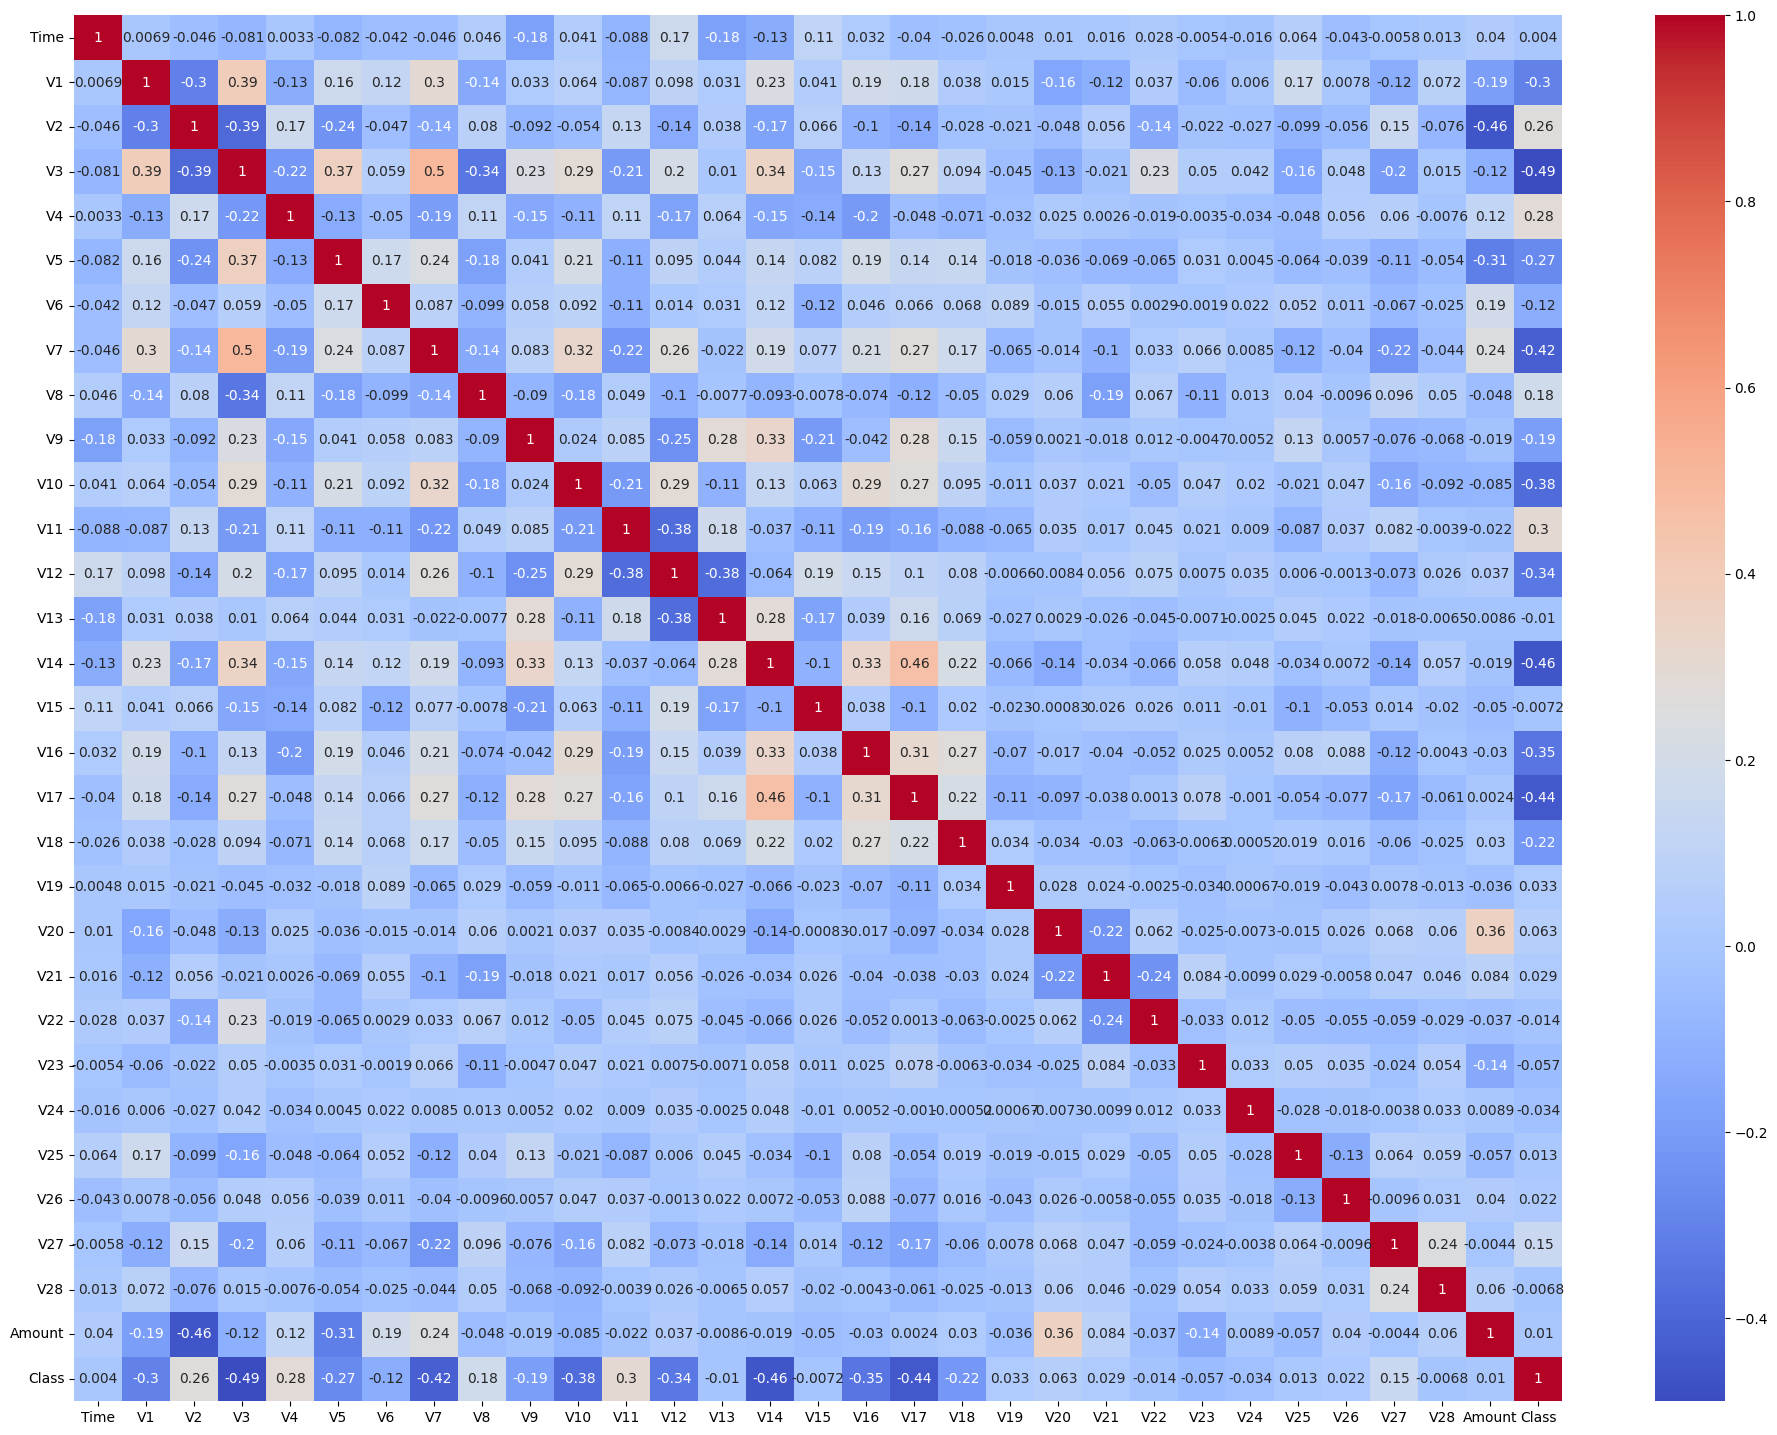

In [90]:
#Their are lot of feature we are unable to see co orelation so we see through heatmap
plt.figure(figsize=(24,18))

sns.heatmap(corr, cmap="coolwarm" , annot = True)
plt.show()

#dark blue is highly correlated ligh is lightly

In [49]:
print("Checking for missing values:")
print(df.isnull().sum())


Checking for missing values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    1
Class     1
dtype: int64


In [50]:
df = df.dropna(subset=['Class'])


splitting into train test

In [51]:
X = df.drop(['Class'], axis=1)
y = df['Class']


In [ ]:
X.head()

In [52]:
X_train , X_test , y_train , y_test = train_test_split(X,y, random_state = 100 , test_size = .20)

In [53]:
#we get total number of values of y , y_train and test

print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

100.0
84.0
16.0


*plotting the distribution of variable

In [54]:
#accumulate all column name in  1 variable

cols = list(X.columns.values)

<ipython-input-55-1c2d047cd510>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col][normal_records] , color = 'green')
<ipython-input-55-1c2d047cd510>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col][fraud_records] , color = 'red')
<ipython-input-55-1c2d047cd510>:11: UserWarning: 



ValueError: num must be an integer with 1 <= num <= 10, not 11

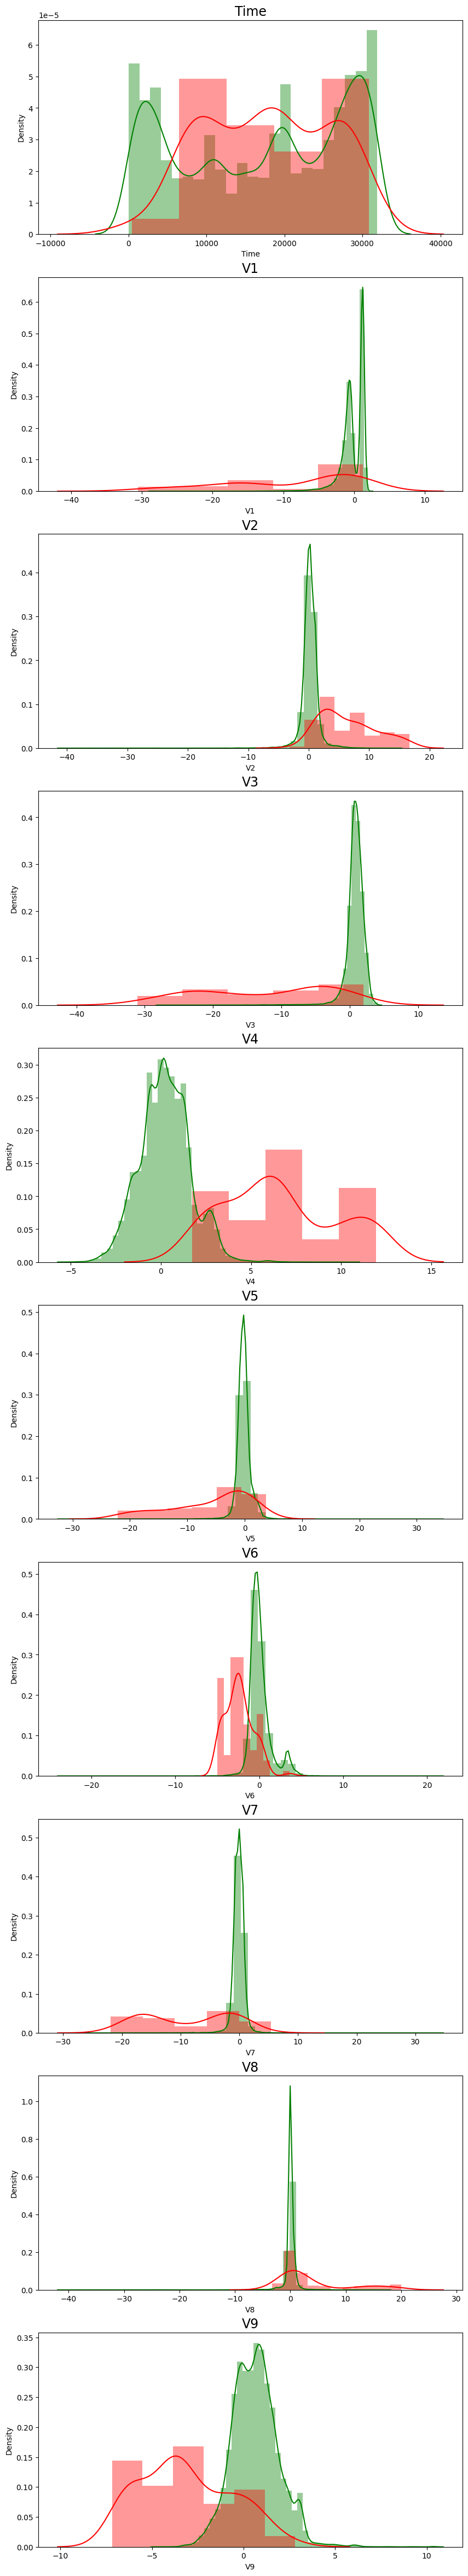

In [55]:
# p lot histogram of  a variable from the dataset to see the SKEWNESS
#skewness tells asymmetry of data


normal_records = df.Class == 0
fraud_records = df.Class == 1
""
plt.figure(figsize = (10,60))
for n , col in enumerate (cols):
  plt.subplot(10 ,1,n+1)
  sns.distplot(X[col][normal_records] , color = 'green')
  sns.distplot(X[col][fraud_records] , color = 'red')
  plt.title(col, fontsize=17)
plt.show()

Model building

In [57]:
df_Result = pd.DataFrame(columns= [ 'Methodology''Model','Accuracy','roc_value','threshold'])

In [58]:
def Plot_confusion_matrix(y_test , pred_test):
  cm = confusion_matrix(y_test,pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest' , cmap = plt.cm.Accent)
  categoryNames = ['Non-Fraudalent' , 'Fraudalent']
  plt.title('Confusion Matrix- Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ticks = np.arange(len(categoryNames))
  plt.xticks(ticks , categoryNames, rotation = 45)
  plt.ticks(ticks, categoryNames)

  s = [['TN ','FP'],['FN','TP']]
#print value in confusion matrix
  for i in range(2):
    for j in range(2):
      plt.text(j,i,str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
  plt.show()


In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def buildAndRunKNNModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    # Create KNN model and fit the model with train dataset
    knn = KNeighborsClassifier(n_neighbors=5, n_jobs=16)
    knn.fit(X_train, y_train)

    # Calculate accuracy score
    score = knn.score(X_test, y_test)
    print("Model score:", score)

    # Predict the labels for the test set
    y_pred = knn.predict(X_test)

    # Calculate accuracy
    KNN_Accuracy = accuracy_score(y_test, y_pred)

    # Print confusion matrix
    print("Confusion Matrix")
    print(confusion_matrix(y_test, y_pred))

    # Print classification report
    print("Classification Report")
    print(classification_report(y_test, y_pred))

    # Predict probabilities for the ROC curve
    knn_probs = knn.predict_proba(X_test)[:, 1]

    # Calculate ROC AUC
    knn_roc_value = roc_auc_score(y_test, knn_probs)
    print("KNN ROC AUC value:", knn_roc_value)

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, knn_probs)

    # Determine the best threshold (where tpr - fpr is maximized)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    print("KNN Optimal Threshold:", optimal_threshold)

    # Calculate AUC of the ROC curve
    roc_auc = auc(fpr, tpr)
    print("ROC AUC for the test dataset:", roc_auc)

    # Plot ROC curve
    plt.plot(fpr, tpr, label="Test, AUC=" + str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    # Append the results to the results DataFrame
    df_Results = df_Results.append(pd.DataFrame({
        'Methodology': [Methodology],
        'Model': ['KNN'],
        'Accuracy': [KNN_Accuracy],
        'ROC AUC': [knn_roc_value]
    }), ignore_index=True)

    return df_Results



In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def buildAndRunTreeModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    criteria = ['gini', 'entropy']
    for c in criteria:
        # Initialize the Decision Tree model with the specified criterion
        dt = DecisionTreeClassifier(criterion=c, random_state=42)

        # Fit the model
        dt.fit(X_train, y_train)

        # Make predictions
        y_pred = dt.predict(X_test)

        # Calculate the accuracy score
        test_score = dt.score(X_test, y_test)

        # Get the predicted probabilities for the positive class
        tree_preds = dt.predict_proba(X_test)[:, 1]

        # Calculate the ROC AUC score
        tree_roc_value = roc_auc_score(y_test, tree_preds)

        # Print the results
        print(f"{c} score: {test_score:.4f}")
        print("Confusion Matrix")
        ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)
        plt.show()
        print("Classification Report")
        print(classification_report(y_test, y_pred))
        print(f"{c} tree_roc_value: {tree_roc_value:.4f}")

        # Calculate the ROC curve
        fpr, tpr, thresholds = roc_curve(y_test, tree_preds)
        threshold = thresholds[np.argmax(tpr - fpr)]
        print(f"Tree threshold: {threshold:.4f}")
        roc_auc = auc(fpr, tpr)
        print(f"ROC AUC for the test dataset: {roc_auc:.4f}")

        # Plot the ROC curve
        plt.plot(fpr, tpr, label=f"Test, AUC={roc_auc:.4f}")
        plt.legend(loc=4)
        plt.show()

        # Append the results to the DataFrame
        df_Results = df_Results.append(pd.DataFrame({'Methodology': [Methodology],
                                                     'Model': [f"Tree Model ({c})"],
                                                     'Test Score': [test_score],
                                                     'ROC AUC Value': [tree_roc_value]}))

    return df_Results



In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def buildAndRunRandomForestModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    # Create the Random Forest model with 100 trees
    RF_model = RandomForestClassifier(n_estimators=100, bootstrap=True, max_features='sqrt', random_state=42)

    # Fit the model on the training data
    RF_model.fit(X_train, y_train)

    # Evaluate the model
    RF_test_score = RF_model.score(X_test, y_test)
    print("Model Accuracy: {:.4f}".format(RF_test_score))

    # Make actual class predictions
    rf_predictions = RF_model.predict(X_test)

    # Display the confusion matrix
    print("Confusion Matrix")
    cm = confusion_matrix(y_test, rf_predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

    # Display the classification report
    print("Classification Report")
    print(classification_report(y_test, rf_predictions))

    # Get the probabilities for the positive class
    rf_probs = RF_model.predict_proba(X_test)[:, 1]

    # Calculate the ROC AUC score
    roc_value = roc_auc_score(y_test, rf_probs)
    print("Random Forest ROC AUC: {:.4f}".format(roc_value))

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, rf_probs)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("Random Forest Threshold: {:.4f}".format(threshold))

    # Calculate the ROC AUC value
    roc_auc = auc(fpr, tpr)
    print("ROC for the test dataset: {:.4f}".format(roc_auc))

    # Plot the ROC curve
    plt.plot(fpr, tpr, label="Test, AUC={:.4f}".format(roc_auc))
    plt.legend(loc=4)
    plt.show()

    # Append the results to the DataFrame
    df_Results = df_Results.append(pd.DataFrame({
        'Methodology': [Methodology],
        'Model': ['Random Forest'],
        'Test Score': [RF_test_score],
        'ROC AUC Value': [roc_value]
    }))

    return df_Results



In [62]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def buildAndRunXGBoostModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    # Initialize the XGBoost model
    XGBmodel = XGBClassifier(random_state=42)

    # Fit the model on the training data
    XGBmodel.fit(X_train, y_train)

    # Make predictions
    y_pred = XGBmodel.predict(X_test)

    # Calculate the accuracy score
    XGB_test_score = XGBmodel.score(X_test, y_test)
    print("Model Accuracy: {:.4f}".format(XGB_test_score))

    # Display the confusion matrix using ConfusionMatrixDisplay
    print("Confusion Matrix")
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

    # Display the classification report
    print("Classification Report")
    print(classification_report(y_test, y_pred))

    # Get the predicted probabilities for the positive class
    XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

    # Calculate the ROC AUC score
    XGB_roc_value = roc_auc_score(y_test, XGB_probs)
    print("XGBoost ROC AUC: {:.4f}".format(XGB_roc_value))

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, XGB_probs)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("XGBoost Threshold: {:.4f}".format(threshold))

    # Calculate the ROC AUC value
    roc_auc = auc(fpr, tpr)
    print("ROC for the test dataset: {:.4f}".format(roc_auc))

    # Plot the ROC curve
    plt.plot(fpr, tpr, label="Test, AUC={:.4f}".format(roc_auc))
    plt.legend(loc=4)
    plt.show()

    # Append the results to the DataFrame
    df_Results = df_Results.append(pd.DataFrame({
        'Methodology': [Methodology],
        'Model': ['XGBoost'],
        'Test Score': [XGB_test_score],
        'ROC AUC Value': [XGB_roc_value]
    }))

    return df_Results



In [63]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def buildAndRunSVMModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    # Initialize the SVM model with a sigmoid kernel
    clf = SVC(kernel='sigmoid', probability=True, random_state=42)

    # Fit the model on the training data
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred_SVM = clf.predict(X_test)

    # Calculate the accuracy score
    SVM_Score = accuracy_score(y_test, y_pred_SVM)
    print("Accuracy Score: {:.4f}".format(SVM_Score))

    # Display the confusion matrix
    print("Confusion Matrix")
    cm = confusion_matrix(y_test, y_pred_SVM)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

    # Display the classification report
    print("Classification Report")
    print(classification_report(y_test, y_pred_SVM))

    # Get the predicted probabilities for the positive class
    svm_probs = clf.predict_proba(X_test)[:, 1]

    # Calculate the ROC AUC score
    roc_value = roc_auc_score(y_test, svm_probs)
    print("SVM ROC AUC: {:.4f}".format(roc_value))

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, svm_probs)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("SVM Threshold: {:.4f}".format(threshold))

    # Calculate the ROC AUC value
    roc_auc = auc(fpr, tpr)
    print("ROC for the test dataset: {:.4f}".format(roc_auc))

    # Plot the ROC curve
    plt.plot(fpr, tpr, label="Test, AUC={:.4f}".format(roc_auc))
    plt.legend(loc=4)
    plt.show()

    # Append the results to the DataFrame
    df_Results = df_Results.append(pd.DataFrame({
        'Methodology': [Methodology],
        'Model': ['SVM (Sigmoid Kernel)'],
        'Test Score': [SVM_Score],
        'ROC AUC Value': [roc_value]
    }))

    return df_Results



perform cross validation with repeated k fold

In [64]:
from sklearn.model_selection import RepeatedKFold

# Initialize the RepeatedKFold with 5 splits and 10 repeats
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)

# Assuming X is the feature set and y is the target
for train_index, test_index in rkf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)

    # Split the data into training and testing sets for this fold
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

    # Here you can train your model using X_train_cv and y_train_cv
    # And then evaluate it using X_test_cv and y_test_cv
    # For example:
    # model.fit(X_train_cv, y_train_cv)
    # y_pred_cv = model.predict(X_test_cv)
    # Evaluate performance on this fold


TRAIN: [    1     3     5 ... 23866 23867 23868] TEST: [    0     2     4 ... 23860 23863 23865]
TRAIN: [    0     1     2 ... 23866 23867 23868] TEST: [    7     9    17 ... 23849 23853 23856]
TRAIN: [    0     1     2 ... 23865 23867 23868] TEST: [    3    22    26 ... 23858 23864 23866]
TRAIN: [    0     2     3 ... 23865 23866 23867] TEST: [    1     8    11 ... 23851 23855 23868]
TRAIN: [    0     1     2 ... 23865 23866 23868] TEST: [    5    10    14 ... 23861 23862 23867]
TRAIN: [    2     3     4 ... 23866 23867 23868] TEST: [    0     1    16 ... 23847 23859 23864]
TRAIN: [    0     1     2 ... 23866 23867 23868] TEST: [    6     7     8 ... 23854 23855 23860]
TRAIN: [    0     1     2 ... 23864 23865 23866] TEST: [    3     4     5 ... 23863 23867 23868]
TRAIN: [    0     1     3 ... 23866 23867 23868] TEST: [    2     9    14 ... 23846 23856 23865]
TRAIN: [    0     1     2 ... 23865 23867 23868] TEST: [   13    19    21 ... 23850 23853 23866]
TRAIN: [    1     2     3 ... 

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def plot_confusion_matrix_manual(y_test, y_pred, labels=None):
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

def buildAndRunLogisticModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    # L1 Regularization (Lasso)
    l1_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
    l1_model.fit(X_train, y_train)
    y_pred_l1 = l1_model.predict(X_test)
    l1_score = l1_model.score(X_test, y_test)
    l1_probs = l1_model.predict_proba(X_test)[:, 1]
    l1_roc_value = roc_auc_score(y_test, l1_probs)

    # L2 Regularization (Ridge)
    l2_model = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
    l2_model.fit(X_train, y_train)
    y_pred_l2 = l2_model.predict(X_test)
    l2_score = l2_model.score(X_test, y_test)
    l2_probs = l2_model.predict_proba(X_test)[:, 1]
    l2_roc_value = roc_auc_score(y_test, l2_probs)

    # Plotting confusion matrix
    plot_confusion_matrix_manual(y_test, y_pred_l1)
    plot_confusion_matrix_manual(y_test, y_pred_l2)

    # Append L1 Results
    df_Results = df_Results.append(pd.DataFrame({
        'Methodology': [Methodology],
        'Model': ['Logistic Regression L1'],
        'Test Score': [l1_score],
        'ROC AUC Value': [l1_roc_value]
    }))

    # Append L2 Results
    df_Results = df_Results.append(pd.DataFrame({
        'Methodology': [Methodology],
        'Model': ['Logistic Regression L2'],
        'Test Score': [l2_score],
        'ROC AUC Value': [l2_roc_value]
    }))

    return df_Results



KNN Model
KNN Model score: 0.9953907395767861
Confusion Matrix
 [[4749    0]
 [  22    2]]
Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4749
         1.0       1.00      0.08      0.15        24

    accuracy                           1.00      4773
   macro avg       1.00      0.54      0.58      4773
weighted avg       1.00      1.00      0.99      4773

KNN ROC AUC value: 0.7693549519197024
KNN Optimal Threshold: 0.2
ROC AUC for the test dataset: 0.7693549519197024


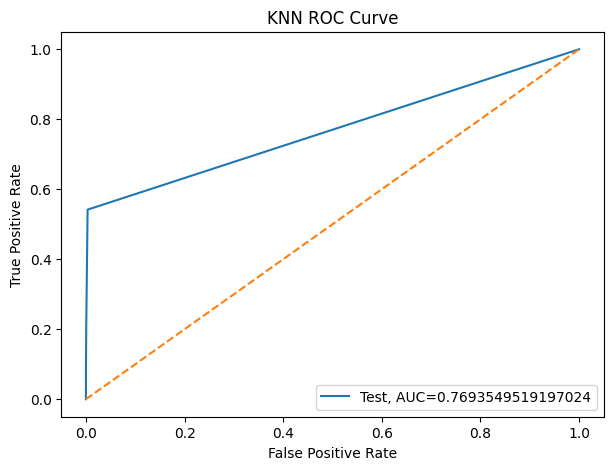

Time Taken by KNN Model: 7.89 seconds
Decision Tree Models
Decision Tree Model score: 0.9991619526503247
Confusion Matrix
 [[4747    2]
 [   2   22]]
Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4749
         1.0       0.92      0.92      0.92        24

    accuracy                           1.00      4773
   macro avg       0.96      0.96      0.96      4773
weighted avg       1.00      1.00      1.00      4773

Decision Tree ROC AUC value: 0.9581227626868813
Decision Tree Optimal Threshold: 1.0
ROC AUC for the test dataset: 0.9581227626868813


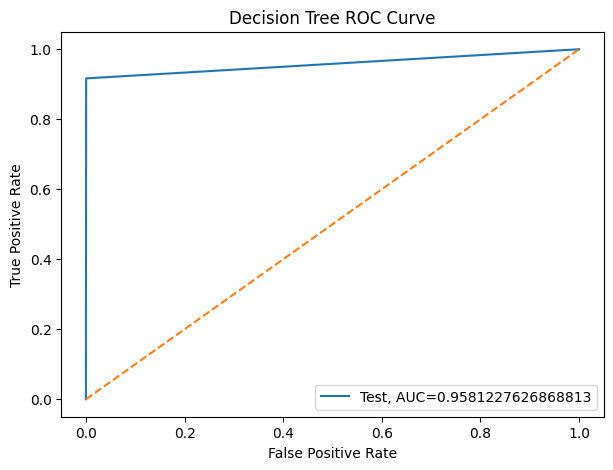

Time Taken by Decision Tree Model: 1.46 seconds
Random Forest Model
Random Forest Model score: 0.9995809763251624
Confusion Matrix
 [[4749    0]
 [   2   22]]
Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4749
         1.0       1.00      0.92      0.96        24

    accuracy                           1.00      4773
   macro avg       1.00      0.96      0.98      4773
weighted avg       1.00      1.00      1.00      4773

Random Forest ROC AUC value: 0.9991226223064505
Random Forest Optimal Threshold: 0.01
ROC AUC for the test dataset: 0.9991226223064505


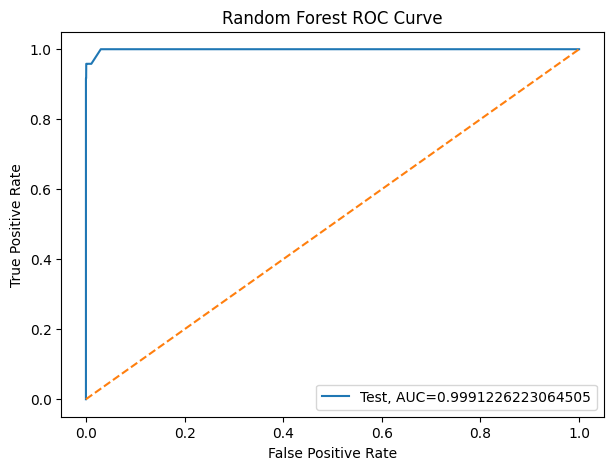

Time Taken by Random Forest Model: 9.28 seconds
XGBoost Model


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:44:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model score: 0.9995809763251624
Confusion Matrix
 [[4749    0]
 [   2   22]]
Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4749
         1.0       1.00      0.92      0.96        24

    accuracy                           1.00      4773
   macro avg       1.00      0.96      0.98      4773
weighted avg       1.00      1.00      1.00      4773

XGBoost ROC AUC value: 0.9984821365901594
XGBoost Optimal Threshold: 0.00015577397
ROC AUC for the test dataset: 0.9984821365901594


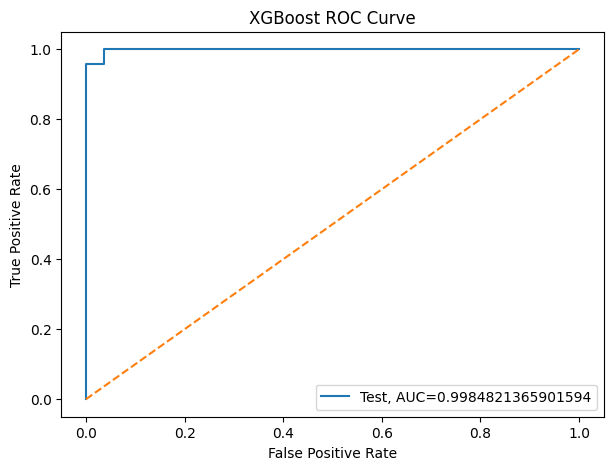

Time Taken by XGBoost Model: 0.79 seconds
SVM Model with Sigmoid Kernel
SVM Model score: 0.9949717159019484
Confusion Matrix
 [[4749    0]
 [  24    0]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4749
         1.0       0.00      0.00      0.00        24

    accuracy                           0.99      4773
   macro avg       0.50      0.50      0.50      4773
weighted avg       0.99      0.99      0.99      4773

SVM ROC AUC value: 0.6242980978451603
SVM Optimal Threshold: 0.005158126458706307
ROC AUC for the test dataset: 0.6242980978451603


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


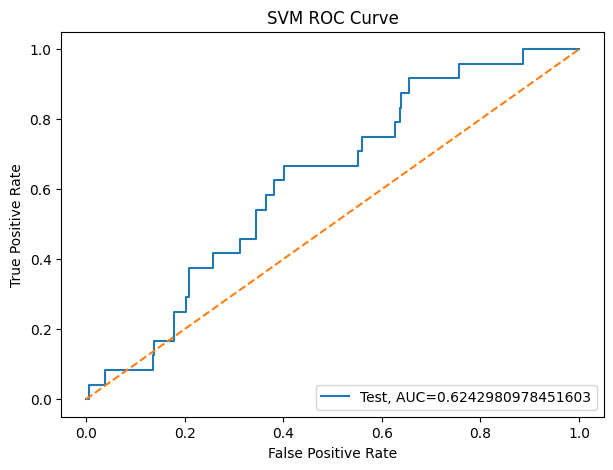

Time Taken by SVM Model: 2.73 seconds
                       Methodology          Model  Accuracy   ROC AUC
0  Repeated KFold Cross Validation            KNN  0.995391  0.769355
1  Repeated KFold Cross Validation  Decision Tree  0.999162  0.958123
2  Repeated KFold Cross Validation  Random Forest  0.999581  0.999123
3  Repeated KFold Cross Validation        XGBoost  0.999581  0.998482
4  Repeated KFold Cross Validation            SVM  0.994972  0.624298


In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

def buildAndRunKNNModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=5, n_jobs=16)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = knn.score(X_test, y_test)
    print("KNN Model score:", score)

    KNN_Accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    print("Confusion Matrix\n", cm)
    print("Classification Report\n", cr)

    knn_probs = knn.predict_proba(X_test)[:, 1]
    knn_roc_value = roc_auc_score(y_test, knn_probs)
    fpr, tpr, thresholds = roc_curve(y_test, knn_probs)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    roc_auc_value = auc(fpr, tpr)
    print("KNN ROC AUC value:", knn_roc_value)
    print("KNN Optimal Threshold:", optimal_threshold)
    print("ROC AUC for the test dataset:", roc_auc_value)

    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, label="Test, AUC=" + str(roc_auc_value))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title('KNN ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

    new_results = pd.DataFrame({
        'Methodology': [Methodology],
        'Model': ['KNN'],
        'Accuracy': [KNN_Accuracy],
        'ROC AUC': [knn_roc_value]
    })

    df_Results = pd.concat([df_Results, new_results], ignore_index=True)
    return df_Results

def buildAndRunTreeModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    tree = DecisionTreeClassifier(random_state=42)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    score = tree.score(X_test, y_test)
    print("Decision Tree Model score:", score)

    Tree_Accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    print("Confusion Matrix\n", cm)
    print("Classification Report\n", cr)

    tree_probs = tree.predict_proba(X_test)[:, 1]
    tree_roc_value = roc_auc_score(y_test, tree_probs)
    fpr, tpr, thresholds = roc_curve(y_test, tree_probs)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    roc_auc_value = auc(fpr, tpr)
    print("Decision Tree ROC AUC value:", tree_roc_value)
    print("Decision Tree Optimal Threshold:", optimal_threshold)
    print("ROC AUC for the test dataset:", roc_auc_value)

    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, label="Test, AUC=" + str(roc_auc_value))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title('Decision Tree ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

    new_results = pd.DataFrame({
        'Methodology': [Methodology],
        'Model': ['Decision Tree'],
        'Accuracy': [Tree_Accuracy],
        'ROC AUC': [tree_roc_value]
    })

    df_Results = pd.concat([df_Results, new_results], ignore_index=True)
    return df_Results

def buildAndRunRandomForestModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    rf = RandomForestClassifier(random_state=42, n_jobs=16)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    score = rf.score(X_test, y_test)
    print("Random Forest Model score:", score)

    RF_Accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    print("Confusion Matrix\n", cm)
    print("Classification Report\n", cr)

    rf_probs = rf.predict_proba(X_test)[:, 1]
    rf_roc_value = roc_auc_score(y_test, rf_probs)
    fpr, tpr, thresholds = roc_curve(y_test, rf_probs)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    roc_auc_value = auc(fpr, tpr)
    print("Random Forest ROC AUC value:", rf_roc_value)
    print("Random Forest Optimal Threshold:", optimal_threshold)
    print("ROC AUC for the test dataset:", roc_auc_value)

    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, label="Test, AUC=" + str(roc_auc_value))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title('Random Forest ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

    new_results = pd.DataFrame({
        'Methodology': [Methodology],
        'Model': ['Random Forest'],
        'Accuracy': [RF_Accuracy],
        'ROC AUC': [rf_roc_value]
    })

    df_Results = pd.concat([df_Results, new_results], ignore_index=True)
    return df_Results

def buildAndRunXGBoostModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)
    score = xgb.score(X_test, y_test)
    print("XGBoost Model score:", score)

    XGB_Accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    print("Confusion Matrix\n", cm)
    print("Classification Report\n", cr)

    xgb_probs = xgb.predict_proba(X_test)[:, 1]
    xgb_roc_value = roc_auc_score(y_test, xgb_probs)
    fpr, tpr, thresholds = roc_curve(y_test, xgb_probs)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    roc_auc_value = auc(fpr, tpr)
    print("XGBoost ROC AUC value:", xgb_roc_value)
    print("XGBoost Optimal Threshold:", optimal_threshold)
    print("ROC AUC for the test dataset:", roc_auc_value)

    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, label="Test, AUC=" + str(roc_auc_value))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title('XGBoost ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

    new_results = pd.DataFrame({
        'Methodology': [Methodology],
        'Model': ['XGBoost'],
        'Accuracy': [XGB_Accuracy],
        'ROC AUC': [xgb_roc_value]
    })

    df_Results = pd.concat([df_Results, new_results], ignore_index=True)
    return df_Results

def buildAndRunSVMModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    svm = SVC(kernel='sigmoid', probability=True)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    score = svm.score(X_test, y_test)
    print("SVM Model score:", score)

    SVM_Accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    print("Confusion Matrix\n", cm)
    print("Classification Report\n", cr)

    svm_probs = svm.predict_proba(X_test)[:, 1]
    svm_roc_value = roc_auc_score(y_test, svm_probs)
    fpr, tpr, thresholds = roc_curve(y_test, svm_probs)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    roc_auc_value = auc(fpr, tpr)
    print("SVM ROC AUC value:", svm_roc_value)
    print("SVM Optimal Threshold:", optimal_threshold)
    print("ROC AUC for the test dataset:", roc_auc_value)

    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, label="Test, AUC=" + str(roc_auc_value))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title('SVM ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

    new_results = pd.DataFrame({
        'Methodology': [Methodology],
        'Model': ['SVM'],
        'Accuracy': [SVM_Accuracy],
        'ROC AUC': [svm_roc_value]
    })

    df_Results = pd.concat([df_Results, new_results], ignore_index=True)
    return df_Results

# Example usage of the functions
# Assuming X_train_cv, y_train_cv, X_test_cv, y_test_cv, and df_Results are defined

df_Results = pd.DataFrame()

# Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, "Repeated KFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by KNN Model: {:.2f} seconds".format(time.time() - start_time))
print("=" * 60)

# Run Decision Tree Models
print("Decision Tree Models")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, "Repeated KFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Decision Tree Model: {:.2f} seconds".format(time.time() - start_time))
print("=" * 60)

# Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, "Repeated KFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Random Forest Model: {:.2f} seconds".format(time.time() - start_time))
print("=" * 60)

# Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, "Repeated KFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by XGBoost Model: {:.2f} seconds".format(time.time() - start_time))
print("=" * 60)

# Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results, "Repeated KFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by SVM Model: {:.2f} seconds".format(time.time() - start_time))
print("=" * 60)

# Display final results
print(df_Results)


KNN Model
KNN Model score: 0.9953907395767861
Confusion Matrix
 [[4749    0]
 [  22    2]]
Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4749
         1.0       1.00      0.08      0.15        24

    accuracy                           1.00      4773
   macro avg       1.00      0.54      0.58      4773
weighted avg       1.00      1.00      0.99      4773

KNN ROC AUC value: 0.7693549519197024
KNN Optimal Threshold: 0.2
ROC AUC for the test dataset: 0.7693549519197024


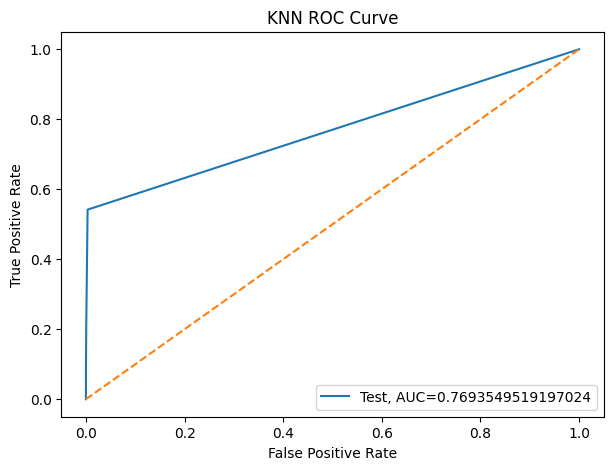

Time Taken by KNN Model: 7.95 seconds
Decision Tree Models
Decision Tree Model score: 0.9991619526503247
Confusion Matrix
 [[4747    2]
 [   2   22]]
Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4749
         1.0       0.92      0.92      0.92        24

    accuracy                           1.00      4773
   macro avg       0.96      0.96      0.96      4773
weighted avg       1.00      1.00      1.00      4773

Decision Tree ROC AUC value: 0.9581227626868813
Decision Tree Optimal Threshold: 1.0
ROC AUC for the test dataset: 0.9581227626868813


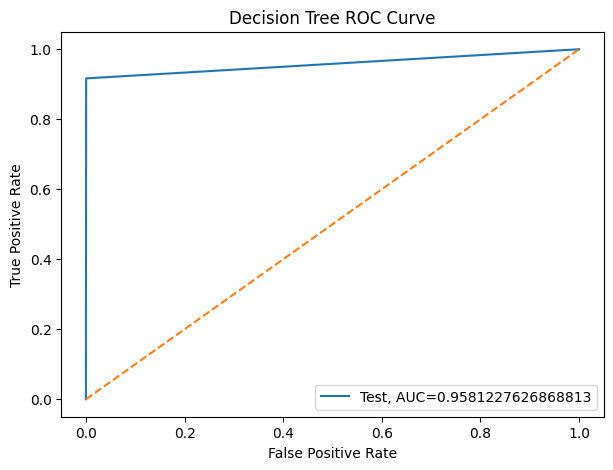

Time Taken by Decision Tree Model: 1.70 seconds
Random Forest Model
Random Forest Model score: 0.9995809763251624
Confusion Matrix
 [[4749    0]
 [   2   22]]
Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4749
         1.0       1.00      0.92      0.96        24

    accuracy                           1.00      4773
   macro avg       1.00      0.96      0.98      4773
weighted avg       1.00      1.00      1.00      4773

Random Forest ROC AUC value: 0.9991226223064505
Random Forest Optimal Threshold: 0.01
ROC AUC for the test dataset: 0.9991226223064505


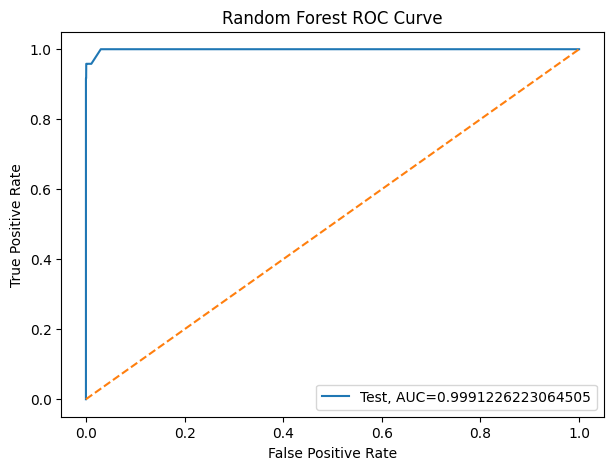

Time Taken by Random Forest Model: 10.29 seconds
XGBoost Model


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:58:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model score: 0.9995809763251624
Confusion Matrix
 [[4749    0]
 [   2   22]]
Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4749
         1.0       1.00      0.92      0.96        24

    accuracy                           1.00      4773
   macro avg       1.00      0.96      0.98      4773
weighted avg       1.00      1.00      1.00      4773

XGBoost ROC AUC value: 0.9984821365901594
XGBoost Optimal Threshold: 0.00015577397
ROC AUC for the test dataset: 0.9984821365901594


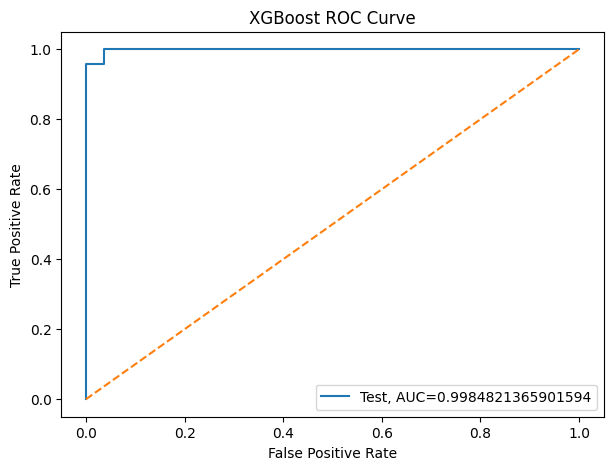

Time Taken by XGBoost Model: 1.54 seconds
SVM Model with Sigmoid Kernel
SVM Model score: 0.9949717159019484
Confusion Matrix
 [[4749    0]
 [  24    0]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4749
         1.0       0.00      0.00      0.00        24

    accuracy                           0.99      4773
   macro avg       0.50      0.50      0.50      4773
weighted avg       0.99      0.99      0.99      4773

SVM ROC AUC value: 0.6242980978451603
SVM Optimal Threshold: 0.005166656476307361
ROC AUC for the test dataset: 0.6242980978451603


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


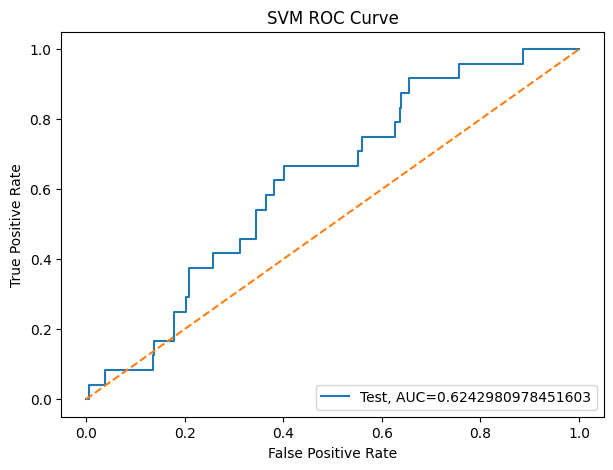

Time Taken by SVM Model: 2.83 seconds
Logistic Regression Models
Logistic Regression (L1) Model score: 0.9989524408129059
Logistic Regression (L1) Confusion Matrix
 [[4749    0]
 [   5   19]]
Logistic Regression (L1) Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4749
         1.0       1.00      0.79      0.88        24

    accuracy                           1.00      4773
   macro avg       1.00      0.90      0.94      4773
weighted avg       1.00      1.00      1.00      4773

Logistic Regression (L1) ROC AUC value: 0.9875675580824034
Logistic Regression (L1) Optimal Threshold: 0.003274616639017419
ROC AUC for the test dataset (L1): 0.9875675580824034


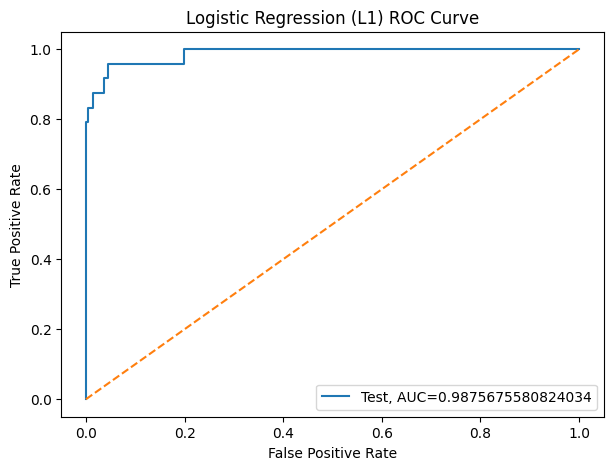

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression (L2) Model score: 0.997695369788393
Logistic Regression (L2) Confusion Matrix
 [[4744    5]
 [   6   18]]
Logistic Regression (L2) Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4749
         1.0       0.78      0.75      0.77        24

    accuracy                           1.00      4773
   macro avg       0.89      0.87      0.88      4773
weighted avg       1.00      1.00      1.00      4773

Logistic Regression (L2) ROC AUC value: 0.9374166491191127
Logistic Regression (L2) Optimal Threshold: 0.05648690094505635
ROC AUC for the test dataset (L2): 0.9374166491191127


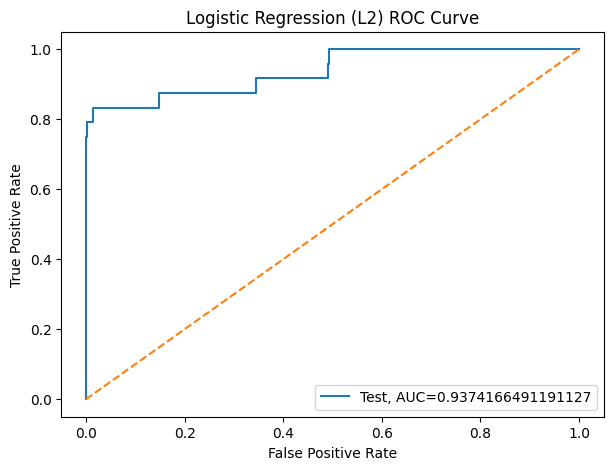

Time Taken by Logistic Regression Models: 1.43 seconds
                       Methodology                     Model  Accuracy  \
0  Repeated KFold Cross Validation                       KNN  0.995391   
1  Repeated KFold Cross Validation             Decision Tree  0.999162   
2  Repeated KFold Cross Validation             Random Forest  0.999581   
3  Repeated KFold Cross Validation                   XGBoost  0.999581   
4  Repeated KFold Cross Validation                       SVM  0.994972   
5  Repeated KFold Cross Validation  Logistic Regression (L1)  0.998952   
6  Repeated KFold Cross Validation  Logistic Regression (L2)  0.997695   

    ROC AUC  
0  0.769355  
1  0.958123  
2  0.999123  
3  0.998482  
4  0.624298  
5  0.987568  
6  0.937417  


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

# Function for KNN Model
def buildAndRunKNNModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=5, n_jobs=16)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = knn.score(X_test, y_test)
    print("KNN Model score:", score)

    KNN_Accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    print("Confusion Matrix\n", cm)
    print("Classification Report\n", cr)

    knn_probs = knn.predict_proba(X_test)[:, 1]
    knn_roc_value = roc_auc_score(y_test, knn_probs)
    fpr, tpr, thresholds = roc_curve(y_test, knn_probs)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    roc_auc_value = auc(fpr, tpr)
    print("KNN ROC AUC value:", knn_roc_value)
    print("KNN Optimal Threshold:", optimal_threshold)
    print("ROC AUC for the test dataset:", roc_auc_value)

    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, label="Test, AUC=" + str(roc_auc_value))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title('KNN ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

    new_results = pd.DataFrame({
        'Methodology': [Methodology],
        'Model': ['KNN'],
        'Accuracy': [KNN_Accuracy],
        'ROC AUC': [knn_roc_value]
    })

    df_Results = pd.concat([df_Results, new_results], ignore_index=True)
    return df_Results

# Function for Decision Tree Model
def buildAndRunTreeModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    tree = DecisionTreeClassifier(random_state=42)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    score = tree.score(X_test, y_test)
    print("Decision Tree Model score:", score)

    Tree_Accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    print("Confusion Matrix\n", cm)
    print("Classification Report\n", cr)

    tree_probs = tree.predict_proba(X_test)[:, 1]
    tree_roc_value = roc_auc_score(y_test, tree_probs)
    fpr, tpr, thresholds = roc_curve(y_test, tree_probs)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    roc_auc_value = auc(fpr, tpr)
    print("Decision Tree ROC AUC value:", tree_roc_value)
    print("Decision Tree Optimal Threshold:", optimal_threshold)
    print("ROC AUC for the test dataset:", roc_auc_value)

    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, label="Test, AUC=" + str(roc_auc_value))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title('Decision Tree ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

    new_results = pd.DataFrame({
        'Methodology': [Methodology],
        'Model': ['Decision Tree'],
        'Accuracy': [Tree_Accuracy],
        'ROC AUC': [tree_roc_value]
    })

    df_Results = pd.concat([df_Results, new_results], ignore_index=True)
    return df_Results

# Function for Random Forest Model
def buildAndRunRandomForestModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    rf = RandomForestClassifier(random_state=42, n_jobs=16)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    score = rf.score(X_test, y_test)
    print("Random Forest Model score:", score)

    RF_Accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    print("Confusion Matrix\n", cm)
    print("Classification Report\n", cr)

    rf_probs = rf.predict_proba(X_test)[:, 1]
    rf_roc_value = roc_auc_score(y_test, rf_probs)
    fpr, tpr, thresholds = roc_curve(y_test, rf_probs)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    roc_auc_value = auc(fpr, tpr)
    print("Random Forest ROC AUC value:", rf_roc_value)
    print("Random Forest Optimal Threshold:", optimal_threshold)
    print("ROC AUC for the test dataset:", roc_auc_value)

    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, label="Test, AUC=" + str(roc_auc_value))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title('Random Forest ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

    new_results = pd.DataFrame({
        'Methodology': [Methodology],
        'Model': ['Random Forest'],
        'Accuracy': [RF_Accuracy],
        'ROC AUC': [rf_roc_value]
    })

    df_Results = pd.concat([df_Results, new_results], ignore_index=True)
    return df_Results

# Function for XGBoost Model
def buildAndRunXGBoostModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)
    score = xgb.score(X_test, y_test)
    print("XGBoost Model score:", score)

    XGB_Accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    print("Confusion Matrix\n", cm)
    print("Classification Report\n", cr)

    xgb_probs = xgb.predict_proba(X_test)[:, 1]
    xgb_roc_value = roc_auc_score(y_test, xgb_probs)
    fpr, tpr, thresholds = roc_curve(y_test, xgb_probs)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    roc_auc_value = auc(fpr, tpr)
    print("XGBoost ROC AUC value:", xgb_roc_value)
    print("XGBoost Optimal Threshold:", optimal_threshold)
    print("ROC AUC for the test dataset:", roc_auc_value)

    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, label="Test, AUC=" + str(roc_auc_value))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title('XGBoost ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

    new_results = pd.DataFrame({
        'Methodology': [Methodology],
        'Model': ['XGBoost'],
        'Accuracy': [XGB_Accuracy],
        'ROC AUC': [xgb_roc_value]
    })

    df_Results = pd.concat([df_Results, new_results], ignore_index=True)
    return df_Results

# Function for SVM Model with Sigmoid Kernel
def buildAndRunSVMModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    svm = SVC(kernel='sigmoid', probability=True)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    score = svm.score(X_test, y_test)
    print("SVM Model score:", score)

    SVM_Accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    print("Confusion Matrix\n", cm)
    print("Classification Report\n", cr)

    svm_probs = svm.predict_proba(X_test)[:, 1]
    svm_roc_value = roc_auc_score(y_test, svm_probs)
    fpr, tpr, thresholds = roc_curve(y_test, svm_probs)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    roc_auc_value = auc(fpr, tpr)
    print("SVM ROC AUC value:", svm_roc_value)
    print("SVM Optimal Threshold:", optimal_threshold)
    print("ROC AUC for the test dataset:", roc_auc_value)

    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, label="Test, AUC=" + str(roc_auc_value))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title('SVM ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

    new_results = pd.DataFrame({
        'Methodology': [Methodology],
        'Model': ['SVM'],
        'Accuracy': [SVM_Accuracy],
        'ROC AUC': [svm_roc_value]
    })

    df_Results = pd.concat([df_Results, new_results], ignore_index=True)
    return df_Results

# Function for Logistic Regression with L1 and L2 regularization
def buildAndRunLogisticRegressionModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    # Logistic Regression with L1 regularization
    lr_l1 = LogisticRegression(penalty='l1', solver='liblinear')
    lr_l1.fit(X_train, y_train)
    y_pred_l1 = lr_l1.predict(X_test)
    score_l1 = lr_l1.score(X_test, y_test)
    print("Logistic Regression (L1) Model score:", score_l1)

    LR_L1_Accuracy = accuracy_score(y_test, y_pred_l1)
    cm_l1 = confusion_matrix(y_test, y_pred_l1)
    cr_l1 = classification_report(y_test, y_pred_l1)
    print("Logistic Regression (L1) Confusion Matrix\n", cm_l1)
    print("Logistic Regression (L1) Classification Report\n", cr_l1)

    lr_l1_probs = lr_l1.predict_proba(X_test)[:, 1]
    lr_l1_roc_value = roc_auc_score(y_test, lr_l1_probs)
    fpr_l1, tpr_l1, thresholds_l1 = roc_curve(y_test, lr_l1_probs)
    optimal_idx_l1 = np.argmax(tpr_l1 - fpr_l1)
    optimal_threshold_l1 = thresholds_l1[optimal_idx_l1]
    roc_auc_value_l1 = auc(fpr_l1, tpr_l1)
    print("Logistic Regression (L1) ROC AUC value:", lr_l1_roc_value)
    print("Logistic Regression (L1) Optimal Threshold:", optimal_threshold_l1)
    print("ROC AUC for the test dataset (L1):", roc_auc_value_l1)

    plt.figure(figsize=(7, 5))
    plt.plot(fpr_l1, tpr_l1, label="Test, AUC=" + str(roc_auc_value_l1))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title('Logistic Regression (L1) ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

    new_results_l1 = pd.DataFrame({
        'Methodology': [Methodology],
        'Model': ['Logistic Regression (L1)'],
        'Accuracy': [LR_L1_Accuracy],
        'ROC AUC': [lr_l1_roc_value]
    })

    df_Results = pd.concat([df_Results, new_results_l1], ignore_index=True)

    # Logistic Regression with L2 regularization
    lr_l2 = LogisticRegression(penalty='l2')
    lr_l2.fit(X_train, y_train)
    y_pred_l2 = lr_l2.predict(X_test)
    score_l2 = lr_l2.score(X_test, y_test)
    print("Logistic Regression (L2) Model score:", score_l2)

    LR_L2_Accuracy = accuracy_score(y_test, y_pred_l2)
    cm_l2 = confusion_matrix(y_test, y_pred_l2)
    cr_l2 = classification_report(y_test, y_pred_l2)
    print("Logistic Regression (L2) Confusion Matrix\n", cm_l2)
    print("Logistic Regression (L2) Classification Report\n", cr_l2)

    lr_l2_probs = lr_l2.predict_proba(X_test)[:, 1]
    lr_l2_roc_value = roc_auc_score(y_test, lr_l2_probs)
    fpr_l2, tpr_l2, thresholds_l2 = roc_curve(y_test, lr_l2_probs)
    optimal_idx_l2 = np.argmax(tpr_l2 - fpr_l2)
    optimal_threshold_l2 = thresholds_l2[optimal_idx_l2]
    roc_auc_value_l2 = auc(fpr_l2, tpr_l2)
    print("Logistic Regression (L2) ROC AUC value:", lr_l2_roc_value)
    print("Logistic Regression (L2) Optimal Threshold:", optimal_threshold_l2)
    print("ROC AUC for the test dataset (L2):", roc_auc_value_l2)

    plt.figure(figsize=(7, 5))
    plt.plot(fpr_l2, tpr_l2, label="Test, AUC=" + str(roc_auc_value_l2))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title('Logistic Regression (L2) ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

    new_results_l2 = pd.DataFrame({
        'Methodology': [Methodology],
        'Model': ['Logistic Regression (L2)'],
        'Accuracy': [LR_L2_Accuracy],
        'ROC AUC': [lr_l2_roc_value]
    })

    df_Results = pd.concat([df_Results, new_results_l2], ignore_index=True)
    return df_Results

# Example usage of the functions
df_Results = pd.DataFrame()

# Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, "Repeated KFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by KNN Model: {:.2f} seconds".format(time.time() - start_time))
print("=" * 60)

# Run Decision Tree Models
print("Decision Tree Models")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, "Repeated KFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Decision Tree Model: {:.2f} seconds".format(time.time() - start_time))
print("=" * 60)

# Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, "Repeated KFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Random Forest Model: {:.2f} seconds".format(time.time() - start_time))
print("=" * 60)

# Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, "Repeated KFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by XGBoost Model: {:.2f} seconds".format(time.time() - start_time))
print("=" * 60)

# Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results, "Repeated KFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by SVM Model: {:.2f} seconds".format(time.time() - start_time))
print("=" * 60)

# Run Logistic Regression with L1 and L2 regularization
print("Logistic Regression Models")
start_time = time.time()
df_Results = buildAndRunLogisticRegressionModels(df_Results, "Repeated KFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Logistic Regression Models: {:.2f} seconds".format(time.time() - start_time))
print("=" * 60)

# Display final results
print(df_Results)


In [79]:
# Find the model with the highest accuracy
best_accuracy_model = df_Results.loc[df_Results['Accuracy'].idxmax()]
print("Model with Best Accuracy:")
print(best_accuracy_model)

# Find the model with the highest ROC AUC
best_roc_auc_model = df_Results.loc[df_Results['ROC AUC'].idxmax()]
print("Model with Best ROC AUC:")
print(best_roc_auc_model)


Model with Best Accuracy:
Methodology    Repeated KFold Cross Validation
Model                            Random Forest
Accuracy                              0.999581
ROC AUC                               0.999123
Name: 2, dtype: object
Model with Best ROC AUC:
Methodology    Repeated KFold Cross Validation
Model                            Random Forest
Accuracy                              0.999581
ROC AUC                               0.999123
Name: 2, dtype: object


perform cross validation with stratified k fold

In [81]:
from sklearn.model_selection import StratifiedKFold

# Example data
# X = your feature set
# y = your target variable

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# Split the data
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)

    # Creating training and testing sets based on the indices
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

    # Now you can use X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv
    # to train your model and validate it on the test set


TRAIN: [ 4770  4771  4772 ... 23866 23867 23868] TEST: [   0    1    2 ... 8100 8321 8323]
TRAIN: [    0     1     2 ... 23866 23867 23868] TEST: [ 4770  4771  4772 ...  9545  9546 10288]
TRAIN: [    0     1     2 ... 23866 23867 23868] TEST: [ 9547  9548  9549 ... 14328 14329 14330]
TRAIN: [    0     1     2 ... 23866 23867 23868] TEST: [12883 12889 13335 ... 19103 19104 19105]
TRAIN: [    0     1     2 ... 19103 19104 19105] TEST: [17498 17531 17558 ... 23866 23867 23868]


KNN Model
KNN Model score: 0.9956011730205279
Confusion Matrix
 [[4753    1]
 [  20    0]]
Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4754
         1.0       0.00      0.00      0.00        20

    accuracy                           1.00      4774
   macro avg       0.50      0.50      0.50      4774
weighted avg       0.99      1.00      0.99      4774

KNN ROC AUC value: 0.7977492637778714
KNN Optimal Threshold: 0.2
ROC AUC for the test dataset: 0.7977492637778714


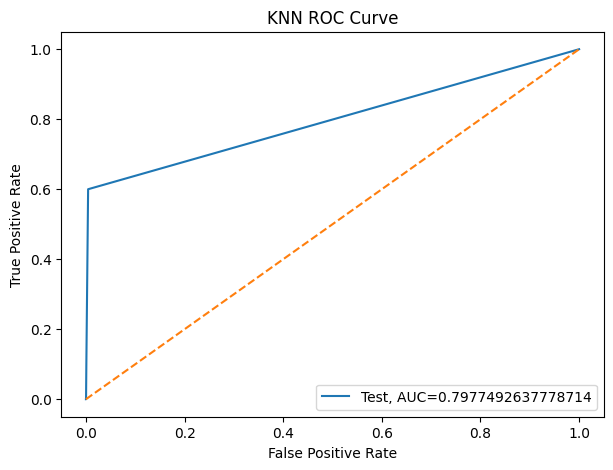

Time Taken by KNN Model: 6.63 seconds
Decision Tree Models
Decision Tree Model score: 0.998533724340176
Confusion Matrix
 [[4749    5]
 [   2   18]]
Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4754
         1.0       0.78      0.90      0.84        20

    accuracy                           1.00      4774
   macro avg       0.89      0.95      0.92      4774
weighted avg       1.00      1.00      1.00      4774

Decision Tree ROC AUC value: 0.9494741270509044
Decision Tree Optimal Threshold: 1.0
ROC AUC for the test dataset: 0.9494741270509044


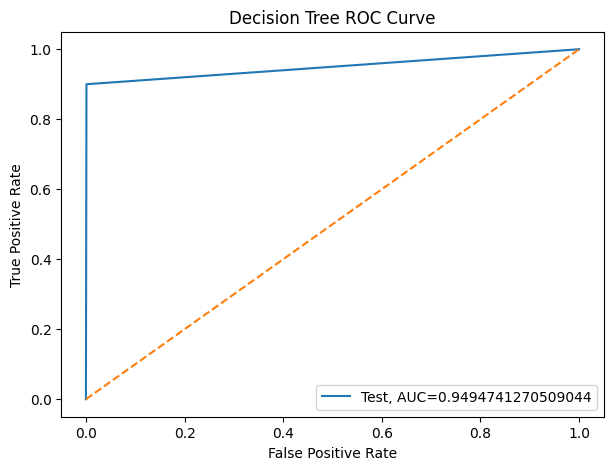

Time Taken by Decision Tree Model: 1.62 seconds
Random Forest Model
Random Forest Model score: 0.9995810640971932
Confusion Matrix
 [[4754    0]
 [   2   18]]
Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4754
         1.0       1.00      0.90      0.95        20

    accuracy                           1.00      4774
   macro avg       1.00      0.95      0.97      4774
weighted avg       1.00      1.00      1.00      4774

Random Forest ROC AUC value: 0.9485801430374421
Random Forest Optimal Threshold: 0.61
ROC AUC for the test dataset: 0.9485801430374421


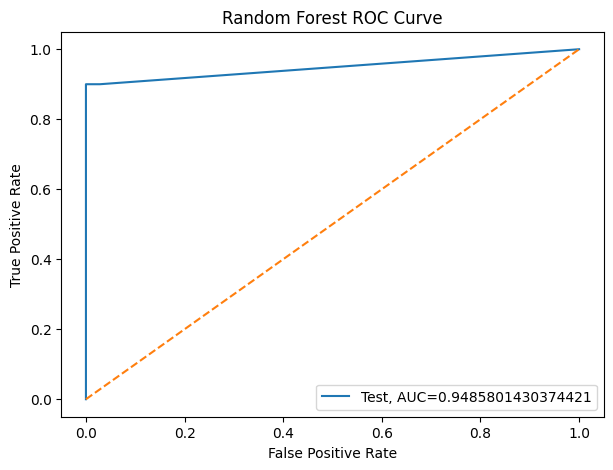

Time Taken by Random Forest Model: 5.42 seconds
XGBoost Model


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:11:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model score: 0.9995810640971932
Confusion Matrix
 [[4754    0]
 [   2   18]]
Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4754
         1.0       1.00      0.90      0.95        20

    accuracy                           1.00      4774
   macro avg       1.00      0.95      0.97      4774
weighted avg       1.00      1.00      1.00      4774

XGBoost ROC AUC value: 0.9860538493899873
XGBoost Optimal Threshold: 0.9754919
ROC AUC for the test dataset: 0.9860538493899873


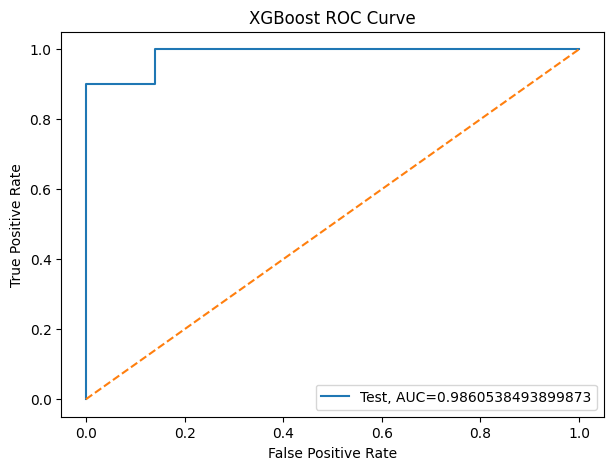

Time Taken by XGBoost Model: 0.57 seconds
SVM Model with Sigmoid Kernel
SVM Model score: 0.9958106409719313
Confusion Matrix
 [[4754    0]
 [  20    0]]
Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4754
         1.0       0.00      0.00      0.00        20

    accuracy                           1.00      4774
   macro avg       0.50      0.50      0.50      4774
weighted avg       0.99      1.00      0.99      4774

SVM ROC AUC value: 0.5878418174169121
SVM Optimal Threshold: 0.0063758120070528035
ROC AUC for the test dataset: 0.5878418174169121


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


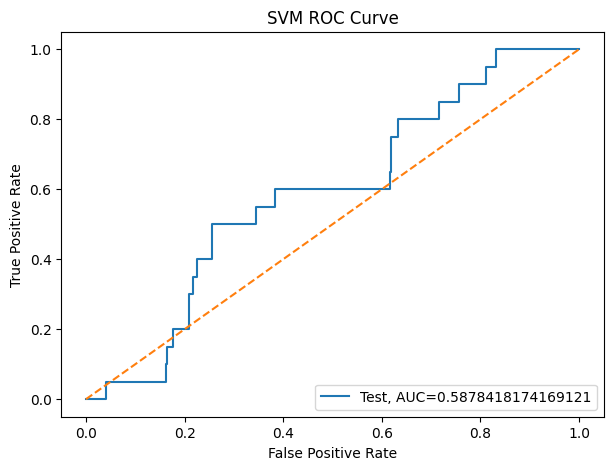

Time Taken by SVM Model: 5.37 seconds
Logistic Regression Models
Logistic Regression (L1) Model score: 0.9993715961457897
Logistic Regression (L1) Confusion Matrix
 [[4754    0]
 [   3   17]]
Logistic Regression (L1) Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4754
         1.0       1.00      0.85      0.92        20

    accuracy                           1.00      4774
   macro avg       1.00      0.93      0.96      4774
weighted avg       1.00      1.00      1.00      4774

Logistic Regression (L1) ROC AUC value: 0.9911758519141776
Logistic Regression (L1) Optimal Threshold: 0.0016142078795730076
ROC AUC for the test dataset (L1): 0.9911758519141776


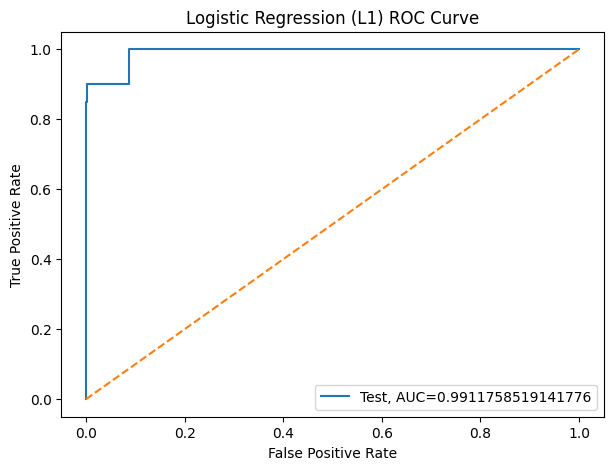

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression (L2) Model score: 0.9970674486803519
Logistic Regression (L2) Confusion Matrix
 [[4747    7]
 [   7   13]]
Logistic Regression (L2) Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4754
         1.0       0.65      0.65      0.65        20

    accuracy                           1.00      4774
   macro avg       0.82      0.82      0.82      4774
weighted avg       1.00      1.00      1.00      4774

Logistic Regression (L2) ROC AUC value: 0.9113588557004628
Logistic Regression (L2) Optimal Threshold: 0.04140450201836258
ROC AUC for the test dataset (L2): 0.9113588557004628


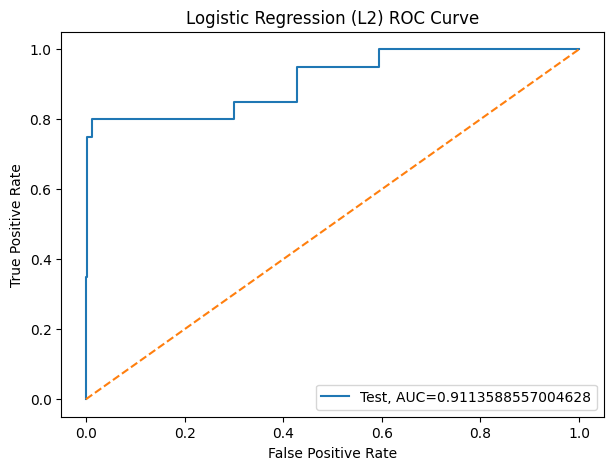

Time Taken by Logistic Regression Models: 1.54 seconds
KNN Model
KNN Model score: 0.9960201089233347
Confusion Matrix
 [[4754    0]
 [  19    1]]
Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4754
         1.0       1.00      0.05      0.10        20

    accuracy                           1.00      4774
   macro avg       1.00      0.53      0.55      4774
weighted avg       1.00      1.00      0.99      4774

KNN ROC AUC value: 0.6984591922591501
KNN Optimal Threshold: 0.2
ROC AUC for the test dataset: 0.6984591922591501


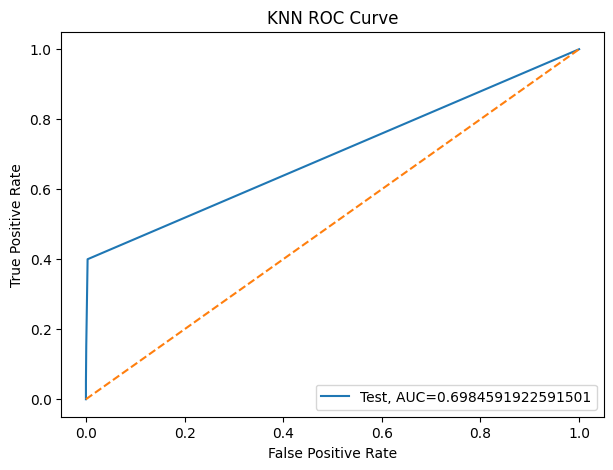

Time Taken by KNN Model: 2.90 seconds
Decision Tree Models
Decision Tree Model score: 0.9989526602429828
Confusion Matrix
 [[4751    3]
 [   2   18]]
Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4754
         1.0       0.86      0.90      0.88        20

    accuracy                           1.00      4774
   macro avg       0.93      0.95      0.94      4774
weighted avg       1.00      1.00      1.00      4774

Decision Tree ROC AUC value: 0.9496844762305426
Decision Tree Optimal Threshold: 1.0
ROC AUC for the test dataset: 0.9496844762305426


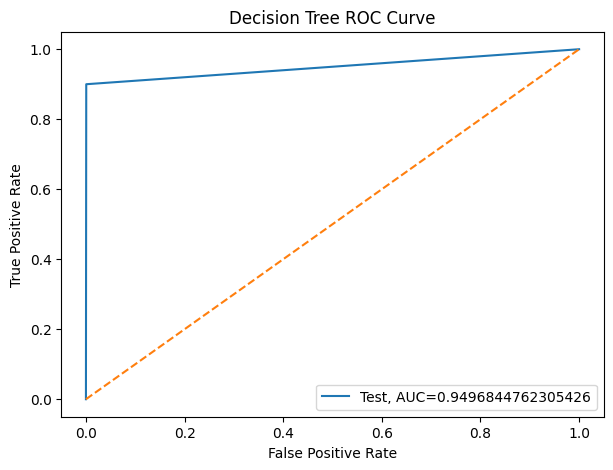

Time Taken by Decision Tree Model: 1.15 seconds
Random Forest Model
Random Forest Model score: 0.9989526602429828
Confusion Matrix
 [[4753    1]
 [   4   16]]
Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4754
         1.0       0.94      0.80      0.86        20

    accuracy                           1.00      4774
   macro avg       0.97      0.90      0.93      4774
weighted avg       1.00      1.00      1.00      4774

Random Forest ROC AUC value: 0.9740744636095919
Random Forest Optimal Threshold: 0.29
ROC AUC for the test dataset: 0.9740744636095919


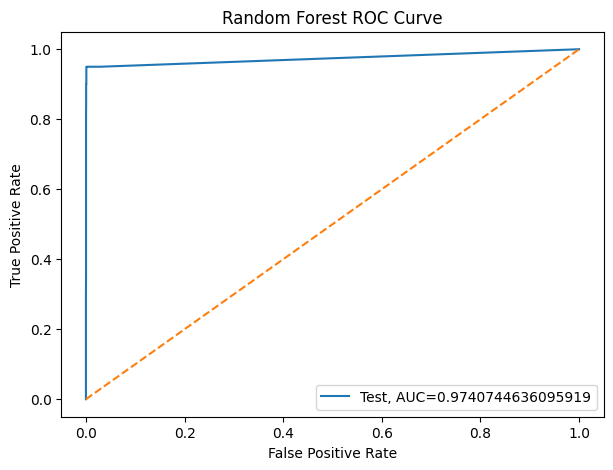

Time Taken by Random Forest Model: 8.54 seconds
XGBoost Model


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:11:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model score: 0.9987431922915794
Confusion Matrix
 [[4753    1]
 [   5   15]]
Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4754
         1.0       0.94      0.75      0.83        20

    accuracy                           1.00      4774
   macro avg       0.97      0.87      0.92      4774
weighted avg       1.00      1.00      1.00      4774

XGBoost ROC AUC value: 0.9938998737904922
XGBoost Optimal Threshold: 0.0009147867
ROC AUC for the test dataset: 0.9938998737904922


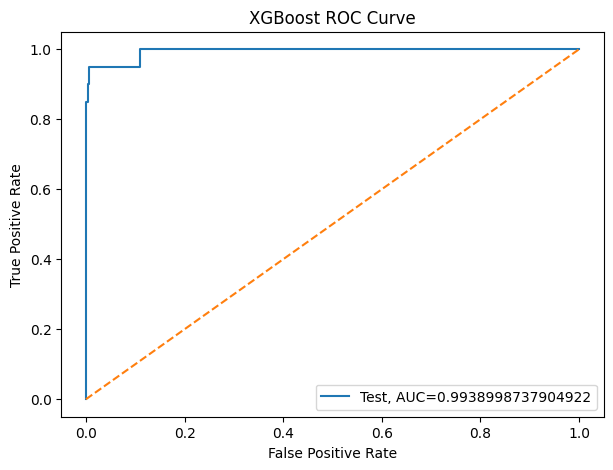

Time Taken by XGBoost Model: 3.27 seconds
SVM Model with Sigmoid Kernel
SVM Model score: 0.9958106409719313
Confusion Matrix
 [[4754    0]
 [  20    0]]
Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4754
         1.0       0.00      0.00      0.00        20

    accuracy                           1.00      4774
   macro avg       0.50      0.50      0.50      4774
weighted avg       0.99      1.00      0.99      4774

SVM ROC AUC value: 0.6414072360117795
SVM Optimal Threshold: 0.008570540752289248
ROC AUC for the test dataset: 0.6414072360117795


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


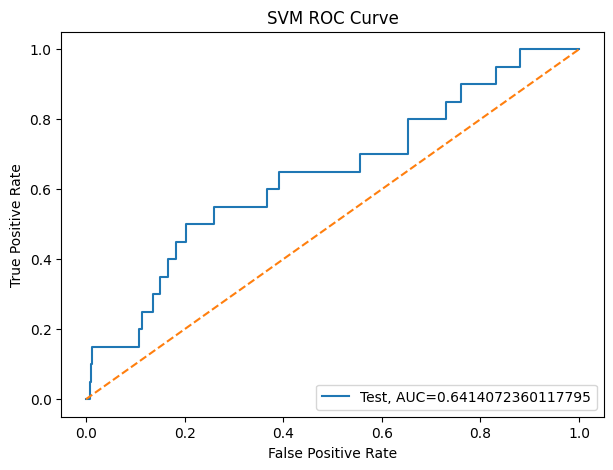

Time Taken by SVM Model: 7.92 seconds
Logistic Regression Models
Logistic Regression (L1) Model score: 0.9979053204859657
Logistic Regression (L1) Confusion Matrix
 [[4752    2]
 [   8   12]]
Logistic Regression (L1) Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4754
         1.0       0.86      0.60      0.71        20

    accuracy                           1.00      4774
   macro avg       0.93      0.80      0.85      4774
weighted avg       1.00      1.00      1.00      4774

Logistic Regression (L1) ROC AUC value: 0.8355069415229281
Logistic Regression (L1) Optimal Threshold: 0.01215038541547267
ROC AUC for the test dataset (L1): 0.8355069415229281


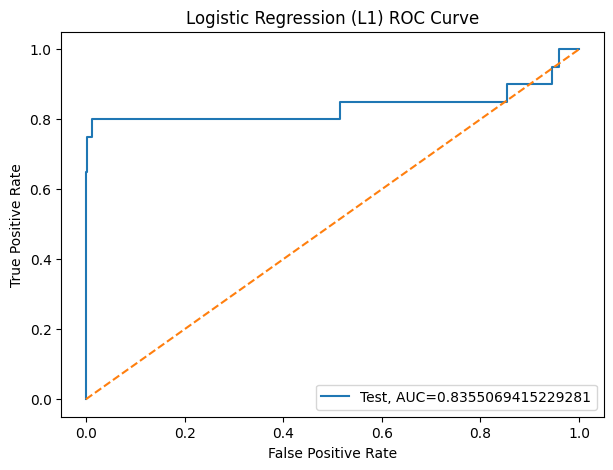

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression (L2) Model score: 0.9968579807289485
Logistic Regression (L2) Confusion Matrix
 [[4745    9]
 [   6   14]]
Logistic Regression (L2) Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4754
         1.0       0.61      0.70      0.65        20

    accuracy                           1.00      4774
   macro avg       0.80      0.85      0.82      4774
weighted avg       1.00      1.00      1.00      4774

Logistic Regression (L2) ROC AUC value: 0.9050799326882625
Logistic Regression (L2) Optimal Threshold: 0.1365383521893357
ROC AUC for the test dataset (L2): 0.9050799326882625


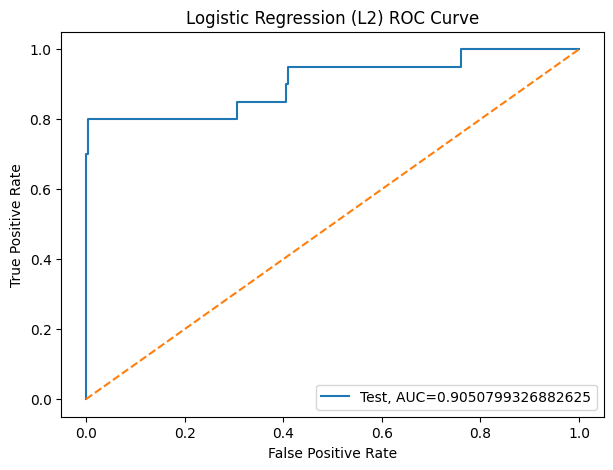

Time Taken by Logistic Regression Models: 3.74 seconds
KNN Model
KNN Model score: 0.9956011730205279
Confusion Matrix
 [[4750    4]
 [  17    3]]
Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4754
         1.0       0.43      0.15      0.22        20

    accuracy                           1.00      4774
   macro avg       0.71      0.57      0.61      4774
weighted avg       0.99      1.00      0.99      4774

KNN ROC AUC value: 0.7967553639040807
KNN Optimal Threshold: 0.2
ROC AUC for the test dataset: 0.7967553639040807


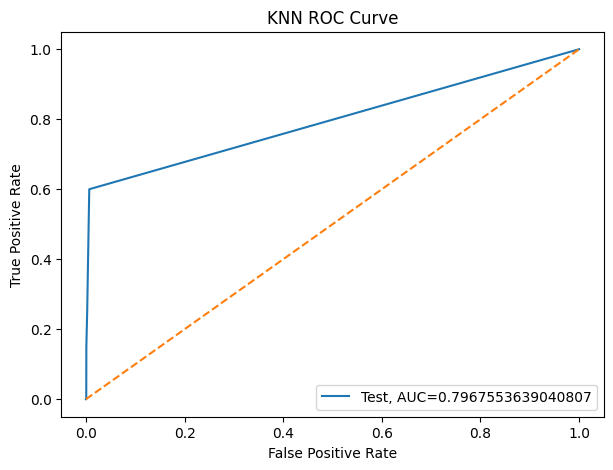

Time Taken by KNN Model: 3.25 seconds
Decision Tree Models
Decision Tree Model score: 0.998533724340176
Confusion Matrix
 [[4749    5]
 [   2   18]]
Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4754
         1.0       0.78      0.90      0.84        20

    accuracy                           1.00      4774
   macro avg       0.89      0.95      0.92      4774
weighted avg       1.00      1.00      1.00      4774

Decision Tree ROC AUC value: 0.9494741270509044
Decision Tree Optimal Threshold: 1.0
ROC AUC for the test dataset: 0.9494741270509044


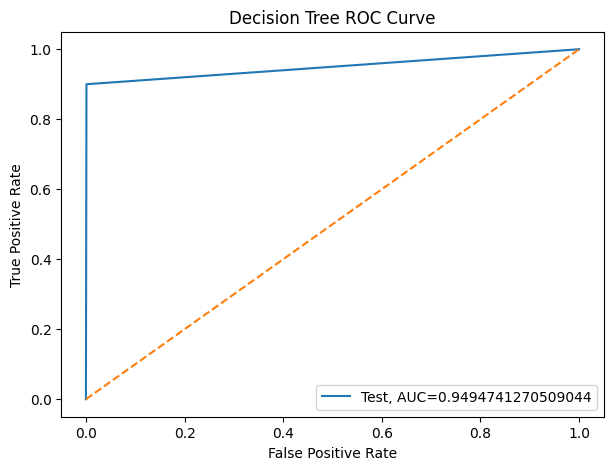

Time Taken by Decision Tree Model: 1.15 seconds
Random Forest Model
Random Forest Model score: 0.9993715961457897
Confusion Matrix
 [[4753    1]
 [   2   18]]
Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4754
         1.0       0.95      0.90      0.92        20

    accuracy                           1.00      4774
   macro avg       0.97      0.95      0.96      4774
weighted avg       1.00      1.00      1.00      4774

Random Forest ROC AUC value: 0.974190155658393
Random Forest Optimal Threshold: 0.34
ROC AUC for the test dataset: 0.974190155658393


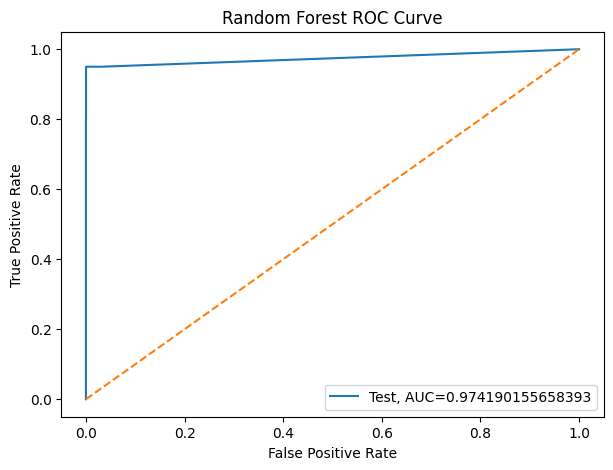

Time Taken by Random Forest Model: 9.63 seconds
XGBoost Model


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:11:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model score: 0.9995810640971932
Confusion Matrix
 [[4754    0]
 [   2   18]]
Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4754
         1.0       1.00      0.90      0.95        20

    accuracy                           1.00      4774
   macro avg       1.00      0.95      0.97      4774
weighted avg       1.00      1.00      1.00      4774

XGBoost ROC AUC value: 0.9981699621371477
XGBoost Optimal Threshold: 0.00018716569
ROC AUC for the test dataset: 0.9981699621371477


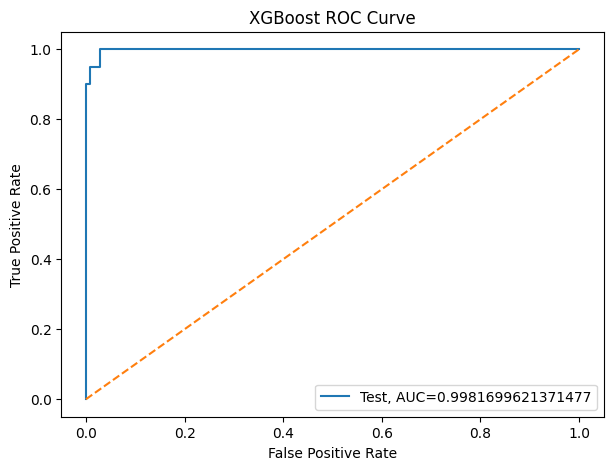

Time Taken by XGBoost Model: 0.82 seconds
SVM Model with Sigmoid Kernel
SVM Model score: 0.9958106409719313
Confusion Matrix
 [[4754    0]
 [  20    0]]
Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4754
         1.0       0.00      0.00      0.00        20

    accuracy                           1.00      4774
   macro avg       0.50      0.50      0.50      4774
weighted avg       0.99      1.00      0.99      4774

SVM ROC AUC value: 0.36925746739587717
SVM Optimal Threshold: 0.0018330556464750843
ROC AUC for the test dataset: 0.36925746739587717


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


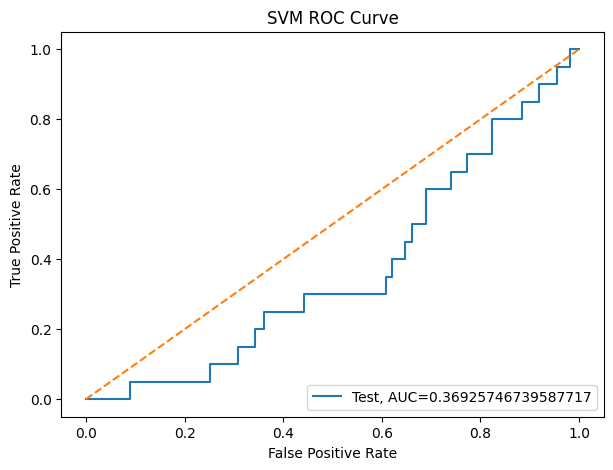

Time Taken by SVM Model: 30.47 seconds
Logistic Regression Models
Logistic Regression (L1) Model score: 0.9989526602429828
Logistic Regression (L1) Confusion Matrix
 [[4753    1]
 [   4   16]]
Logistic Regression (L1) Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4754
         1.0       0.94      0.80      0.86        20

    accuracy                           1.00      4774
   macro avg       0.97      0.90      0.93      4774
weighted avg       1.00      1.00      1.00      4774

Logistic Regression (L1) ROC AUC value: 0.9970971813209928
Logistic Regression (L1) Optimal Threshold: 0.0042377548778765
ROC AUC for the test dataset (L1): 0.9970971813209928


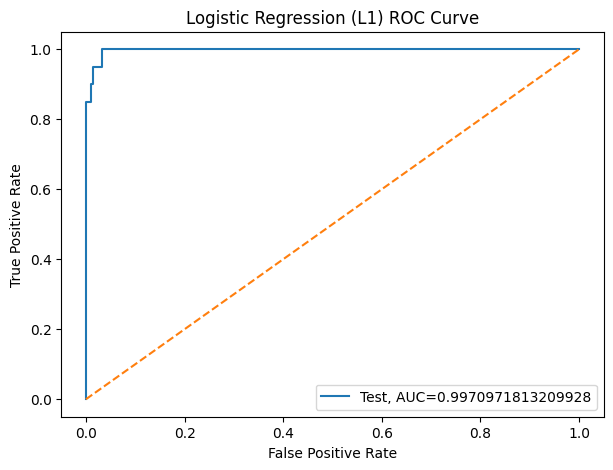

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression (L2) Model score: 0.9979053204859657
Logistic Regression (L2) Confusion Matrix
 [[4749    5]
 [   5   15]]
Logistic Regression (L2) Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4754
         1.0       0.75      0.75      0.75        20

    accuracy                           1.00      4774
   macro avg       0.87      0.87      0.87      4774
weighted avg       1.00      1.00      1.00      4774

Logistic Regression (L2) ROC AUC value: 0.9336979385780396
Logistic Regression (L2) Optimal Threshold: 0.013987211564052667
ROC AUC for the test dataset (L2): 0.9336979385780396


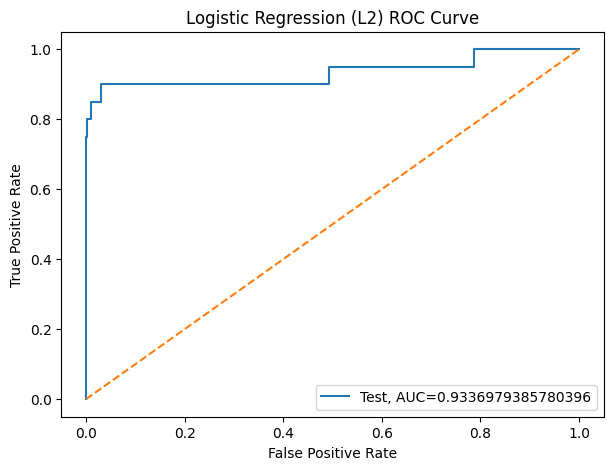

Time Taken by Logistic Regression Models: 1.86 seconds
KNN Model
KNN Model score: 0.9960201089233347
Confusion Matrix
 [[4754    0]
 [  19    1]]
Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4754
         1.0       1.00      0.05      0.10        20

    accuracy                           1.00      4774
   macro avg       1.00      0.53      0.55      4774
weighted avg       1.00      1.00      0.99      4774

KNN ROC AUC value: 0.7482067732435843
KNN Optimal Threshold: 0.2
ROC AUC for the test dataset: 0.7482067732435843


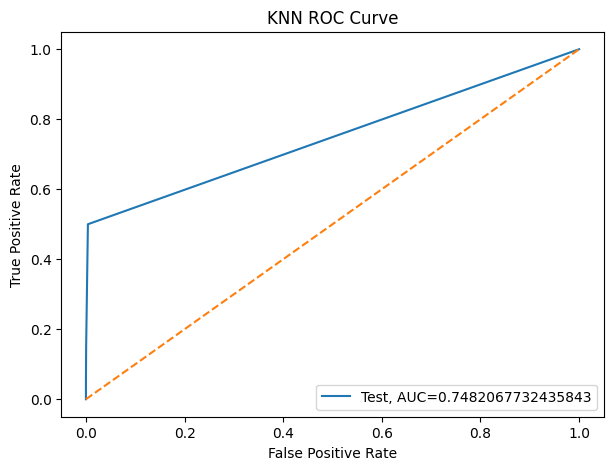

Time Taken by KNN Model: 3.22 seconds
Decision Tree Models
Decision Tree Model score: 0.9993715961457897
Confusion Matrix
 [[4753    1]
 [   2   18]]
Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4754
         1.0       0.95      0.90      0.92        20

    accuracy                           1.00      4774
   macro avg       0.97      0.95      0.96      4774
weighted avg       1.00      1.00      1.00      4774

Decision Tree ROC AUC value: 0.9498948254101809
Decision Tree Optimal Threshold: 1.0
ROC AUC for the test dataset: 0.9498948254101809


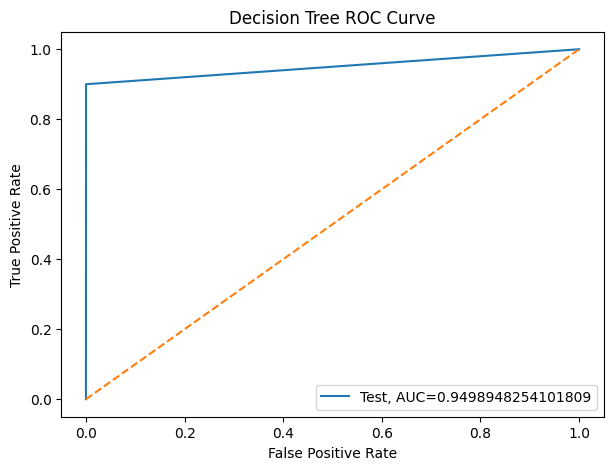

Time Taken by Decision Tree Model: 1.59 seconds
Random Forest Model
Random Forest Model score: 0.9993715961457897
Confusion Matrix
 [[4754    0]
 [   3   17]]
Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4754
         1.0       1.00      0.85      0.92        20

    accuracy                           1.00      4774
   macro avg       1.00      0.93      0.96      4774
weighted avg       1.00      1.00      1.00      4774

Random Forest ROC AUC value: 0.9995424905342869
Random Forest Optimal Threshold: 0.03
ROC AUC for the test dataset: 0.9995424905342869


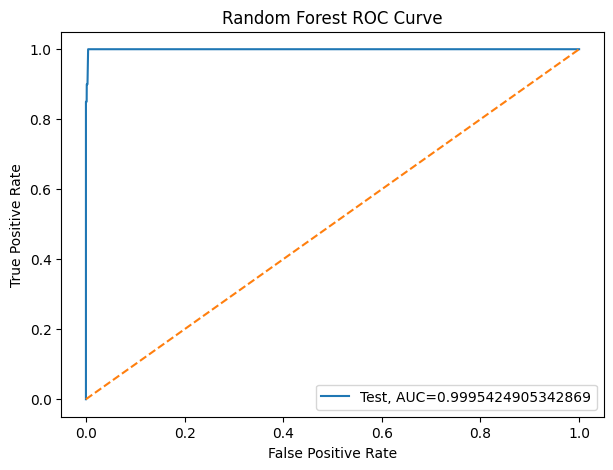

Time Taken by Random Forest Model: 9.67 seconds
XGBoost Model


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:12:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model score: 0.9993715961457897
Confusion Matrix
 [[4754    0]
 [   3   17]]
Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4754
         1.0       1.00      0.85      0.92        20

    accuracy                           1.00      4774
   macro avg       1.00      0.93      0.96      4774
weighted avg       1.00      1.00      1.00      4774

XGBoost ROC AUC value: 0.9998106857383257
XGBoost Optimal Threshold: 0.010738611
ROC AUC for the test dataset: 0.9998106857383257


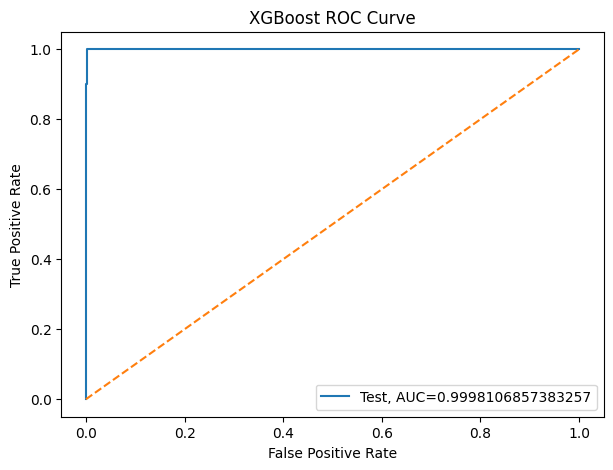

Time Taken by XGBoost Model: 0.82 seconds
SVM Model with Sigmoid Kernel
SVM Model score: 0.9958106409719313
Confusion Matrix
 [[4754    0]
 [  20    0]]
Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4754
         1.0       0.00      0.00      0.00        20

    accuracy                           1.00      4774
   macro avg       0.50      0.50      0.50      4774
weighted avg       0.99      1.00      0.99      4774

SVM ROC AUC value: 0.7199516196886832
SVM Optimal Threshold: 0.006905548440415157
ROC AUC for the test dataset: 0.7199516196886832


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


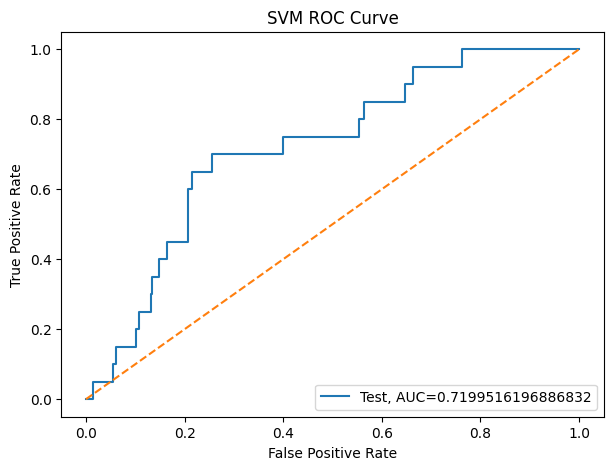

Time Taken by SVM Model: 4.18 seconds
Logistic Regression Models
Logistic Regression (L1) Model score: 0.9983242563887725
Logistic Regression (L1) Confusion Matrix
 [[4752    2]
 [   6   14]]
Logistic Regression (L1) Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4754
         1.0       0.88      0.70      0.78        20

    accuracy                           1.00      4774
   macro avg       0.94      0.85      0.89      4774
weighted avg       1.00      1.00      1.00      4774

Logistic Regression (L1) ROC AUC value: 0.9913651661758519
Logistic Regression (L1) Optimal Threshold: 0.0018850869586782798
ROC AUC for the test dataset (L1): 0.9913651661758519


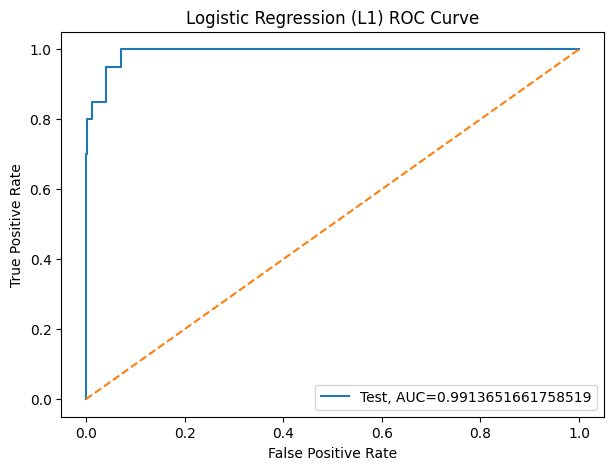

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression (L2) Model score: 0.9976958525345622
Logistic Regression (L2) Confusion Matrix
 [[4750    4]
 [   7   13]]
Logistic Regression (L2) Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4754
         1.0       0.76      0.65      0.70        20

    accuracy                           1.00      4774
   macro avg       0.88      0.82      0.85      4774
weighted avg       1.00      1.00      1.00      4774

Logistic Regression (L2) ROC AUC value: 0.9682688262515776
Logistic Regression (L2) Optimal Threshold: 0.001969532088383131
ROC AUC for the test dataset (L2): 0.9682688262515776


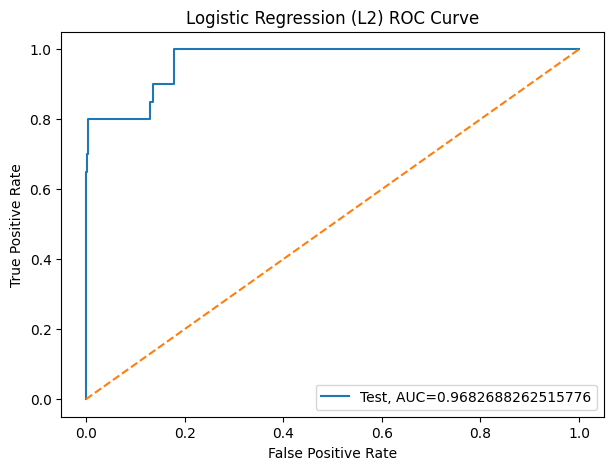

Time Taken by Logistic Regression Models: 3.07 seconds
KNN Model
KNN Model score: 0.9960192750890425
Confusion Matrix
 [[4753    0]
 [  19    1]]
Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4753
         1.0       1.00      0.05      0.10        20

    accuracy                           1.00      4773
   macro avg       1.00      0.53      0.55      4773
weighted avg       1.00      1.00      0.99      4773

KNN ROC AUC value: 0.7228750262991794
KNN Optimal Threshold: 0.2
ROC AUC for the test dataset: 0.7228750262991794


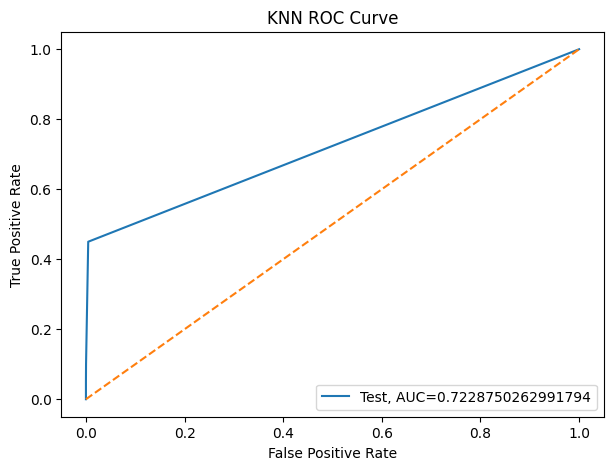

Time Taken by KNN Model: 3.46 seconds
Decision Tree Models
Decision Tree Model score: 0.9985334171380683
Confusion Matrix
 [[4751    2]
 [   5   15]]
Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4753
         1.0       0.88      0.75      0.81        20

    accuracy                           1.00      4773
   macro avg       0.94      0.87      0.91      4773
weighted avg       1.00      1.00      1.00      4773

Decision Tree ROC AUC value: 0.8747896065642752
Decision Tree Optimal Threshold: 1.0
ROC AUC for the test dataset: 0.8747896065642752


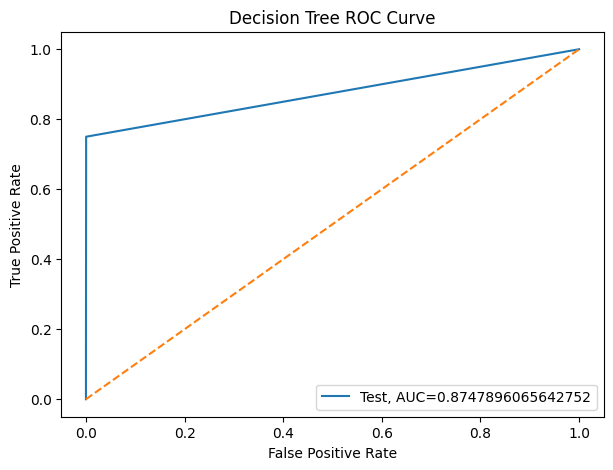

Time Taken by Decision Tree Model: 1.07 seconds
Random Forest Model
Random Forest Model score: 0.9991619526503247
Confusion Matrix
 [[4753    0]
 [   4   16]]
Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4753
         1.0       1.00      0.80      0.89        20

    accuracy                           1.00      4773
   macro avg       1.00      0.90      0.94      4773
weighted avg       1.00      1.00      1.00      4773

Random Forest ROC AUC value: 0.9990900483904902
Random Forest Optimal Threshold: 0.01
ROC AUC for the test dataset: 0.9990900483904902


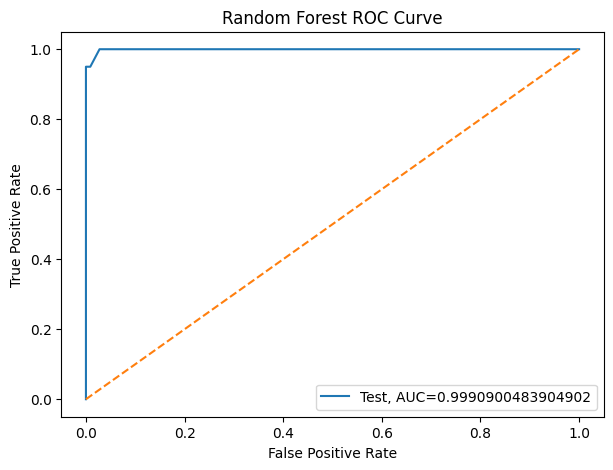

Time Taken by Random Forest Model: 8.81 seconds
XGBoost Model


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:13:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model score: 0.9997904881625812
Confusion Matrix
 [[4753    0]
 [   1   19]]
Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4753
         1.0       1.00      0.95      0.97        20

    accuracy                           1.00      4773
   macro avg       1.00      0.97      0.99      4773
weighted avg       1.00      1.00      1.00      4773

XGBoost ROC AUC value: 0.9997054491899852
XGBoost Optimal Threshold: 0.0012456967
ROC AUC for the test dataset: 0.9997054491899852


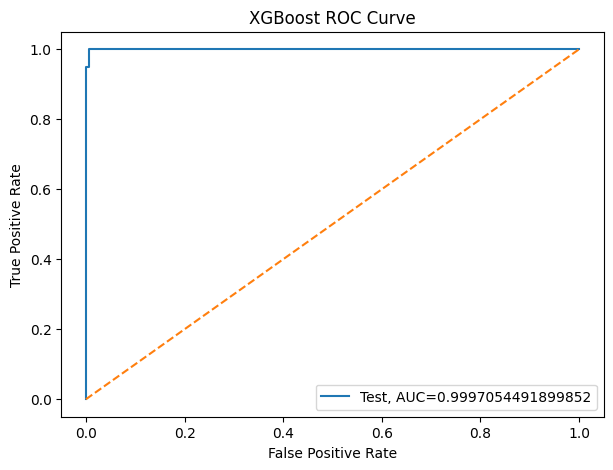

Time Taken by XGBoost Model: 1.87 seconds
SVM Model with Sigmoid Kernel
SVM Model score: 0.9958097632516237
Confusion Matrix
 [[4753    0]
 [  20    0]]
Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4753
         1.0       0.00      0.00      0.00        20

    accuracy                           1.00      4773
   macro avg       0.50      0.50      0.50      4773
weighted avg       0.99      1.00      0.99      4773

SVM ROC AUC value: 0.3460551230801599
SVM Optimal Threshold: 0.001687644548934628
ROC AUC for the test dataset: 0.3460551230801599


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


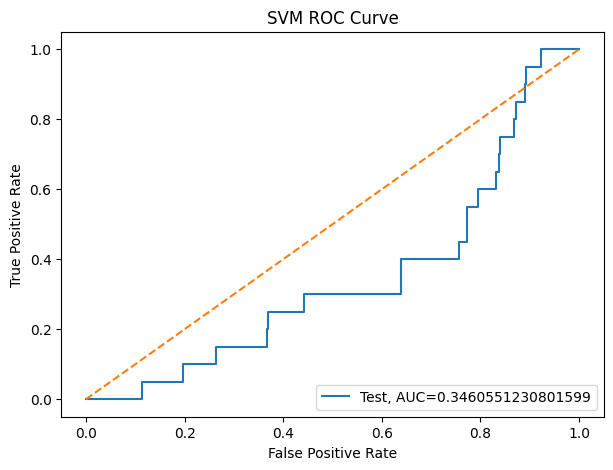

Time Taken by SVM Model: 23.53 seconds
Logistic Regression Models
Logistic Regression (L1) Model score: 0.9981143934632307
Logistic Regression (L1) Confusion Matrix
 [[4753    0]
 [   9   11]]
Logistic Regression (L1) Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4753
         1.0       1.00      0.55      0.71        20

    accuracy                           1.00      4773
   macro avg       1.00      0.78      0.85      4773
weighted avg       1.00      1.00      1.00      4773

Logistic Regression (L1) ROC AUC value: 0.9959814853776563
Logistic Regression (L1) Optimal Threshold: 0.0036181934085507575
ROC AUC for the test dataset (L1): 0.9959814853776563


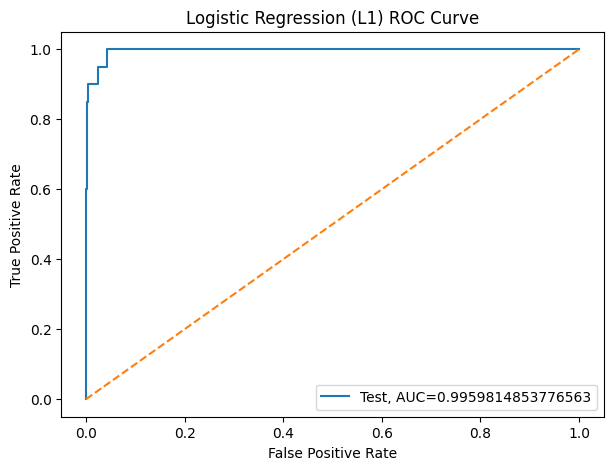

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression (L2) Model score: 0.9974858579509742
Logistic Regression (L2) Confusion Matrix
 [[4752    1]
 [  11    9]]
Logistic Regression (L2) Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4753
         1.0       0.90      0.45      0.60        20

    accuracy                           1.00      4773
   macro avg       0.95      0.72      0.80      4773
weighted avg       1.00      1.00      1.00      4773

Logistic Regression (L2) ROC AUC value: 0.828634546602146
Logistic Regression (L2) Optimal Threshold: 0.07033133710652358
ROC AUC for the test dataset (L2): 0.828634546602146


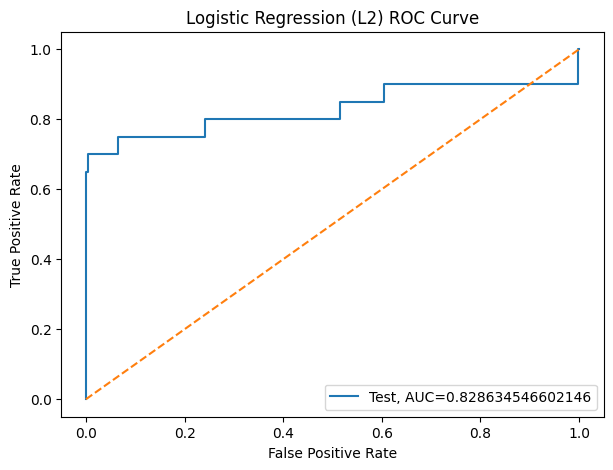

Time Taken by Logistic Regression Models: 3.61 seconds
                         Methodology                     Model  Accuracy  \
0   StratifiedKFold Cross Validation                       KNN  0.995601   
1   StratifiedKFold Cross Validation             Decision Tree  0.998534   
2   StratifiedKFold Cross Validation             Random Forest  0.999581   
3   StratifiedKFold Cross Validation                   XGBoost  0.999581   
4   StratifiedKFold Cross Validation                       SVM  0.995811   
5   StratifiedKFold Cross Validation  Logistic Regression (L1)  0.999372   
6   StratifiedKFold Cross Validation  Logistic Regression (L2)  0.997067   
7   StratifiedKFold Cross Validation                       KNN  0.996020   
8   StratifiedKFold Cross Validation             Decision Tree  0.998953   
9   StratifiedKFold Cross Validation             Random Forest  0.998953   
10  StratifiedKFold Cross Validation                   XGBoost  0.998743   
11  StratifiedKFold Cross Validat

In [83]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# DataFrames to store results
df_Results = pd.DataFrame()

# Define the functions for building and running models as provided earlier
# ...

# Function to run models using StratifiedKFold
def run_models_with_cv(X, y):
    global df_Results

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Run KNN Model
        print("KNN Model")
        start_time = time.time()
        df_Results = buildAndRunKNNModels(df_Results, "StratifiedKFold Cross Validation", X_train, y_train, X_test, y_test)
        print("Time Taken by KNN Model: {:.2f} seconds".format(time.time() - start_time))
        print("=" * 60)

        # Run Decision Tree Models
        print("Decision Tree Models")
        start_time = time.time()
        df_Results = buildAndRunTreeModels(df_Results, "StratifiedKFold Cross Validation", X_train, y_train, X_test, y_test)
        print("Time Taken by Decision Tree Model: {:.2f} seconds".format(time.time() - start_time))
        print("=" * 60)

        # Run Random Forest Model
        print("Random Forest Model")
        start_time = time.time()
        df_Results = buildAndRunRandomForestModels(df_Results, "StratifiedKFold Cross Validation", X_train, y_train, X_test, y_test)
        print("Time Taken by Random Forest Model: {:.2f} seconds".format(time.time() - start_time))
        print("=" * 60)

        # Run XGBoost Model
        print("XGBoost Model")
        start_time = time.time()
        df_Results = buildAndRunXGBoostModels(df_Results, "StratifiedKFold Cross Validation", X_train, y_train, X_test, y_test)
        print("Time Taken by XGBoost Model: {:.2f} seconds".format(time.time() - start_time))
        print("=" * 60)

        # Run SVM Model with Sigmoid Kernel
        print("SVM Model with Sigmoid Kernel")
        start_time = time.time()
        df_Results = buildAndRunSVMModels(df_Results, "StratifiedKFold Cross Validation", X_train, y_train, X_test, y_test)
        print("Time Taken by SVM Model: {:.2f} seconds".format(time.time() - start_time))
        print("=" * 60)

        # Run Logistic Regression with L1 and L2 regularization
        print("Logistic Regression Models")
        start_time = time.time()
        df_Results = buildAndRunLogisticRegressionModels(df_Results, "StratifiedKFold Cross Validation", X_train, y_train, X_test, y_test)
        print("Time Taken by Logistic Regression Models: {:.2f} seconds".format(time.time() - start_time))
        print("=" * 60)

# Example usage with StratifiedKFold
# Assuming X and y are your feature matrix and target vector
run_models_with_cv(X, y)

# Display final results
print(df_Results)


In [84]:
# Sort by ROC AUC to find the best model based on this metric
best_model_roc_auc = df_Results.sort_values(by='ROC AUC', ascending=False).iloc[0]
print("Best Model based on ROC AUC:")
print(best_model_roc_auc)

# Sort by Accuracy to find the best model based on this metric
best_model_accuracy = df_Results.sort_values(by='Accuracy', ascending=False).iloc[0]
print("Best Model based on Accuracy:")
print(best_model_accuracy)


Best Model based on ROC AUC:
Methodology    StratifiedKFold Cross Validation
Model                                   XGBoost
Accuracy                               0.999372
ROC AUC                                0.999811
Name: 24, dtype: object
Best Model based on Accuracy:
Methodology    StratifiedKFold Cross Validation
Model                                   XGBoost
Accuracy                                0.99979
ROC AUC                                0.999705
Name: 31, dtype: object


hypertuning

In [85]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import numpy as np

# Example data
# X = your feature set
# y = your target variable

# Define XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'subsample': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

# Define Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Hyperparameter Tuning using RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_grid,
                                   n_iter=50, scoring='roc_auc', n_jobs=-1,
                                   cv=skf, verbose=2, random_state=42)

# Fit the model
random_search.fit(X_train_SKF_cv, y_train_SKF_cv)

# Best parameters found by RandomizedSearchCV
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

# Evaluate the model on test data
y_pred_xgb = random_search.predict(X_test_SKF_cv)
y_pred_probs_xgb = random_search.predict_proba(X_test_SKF_cv)[:, 1]

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test_SKF_cv, y_pred_xgb)
print(f"Accuracy of XGBoost model: {accuracy_xgb}")

# Calculate ROC AUC score
roc_auc_xgb = roc_auc_score(y_test_SKF_cv, y_pred_probs_xgb)
print(f"ROC AUC of XGBoost model: {roc_auc_xgb}")

# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_SKF_cv, y_pred_probs_xgb)

# Find the optimal threshold (You can choose based on some criteria)
optimal_threshold = thresholds[np.argmax(tpr - fpr)]
print(f"Optimal threshold: {optimal_threshold}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:26:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'subsample': 0.7, 'reg_lambda': 1.5, 'reg_alpha': 0.5, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 1.0}
Accuracy of XGBoost model: 0.9989524408129059
ROC AUC of XGBoost model: 0.9993162213338944
Optimal threshold: 0.0020155359525233507


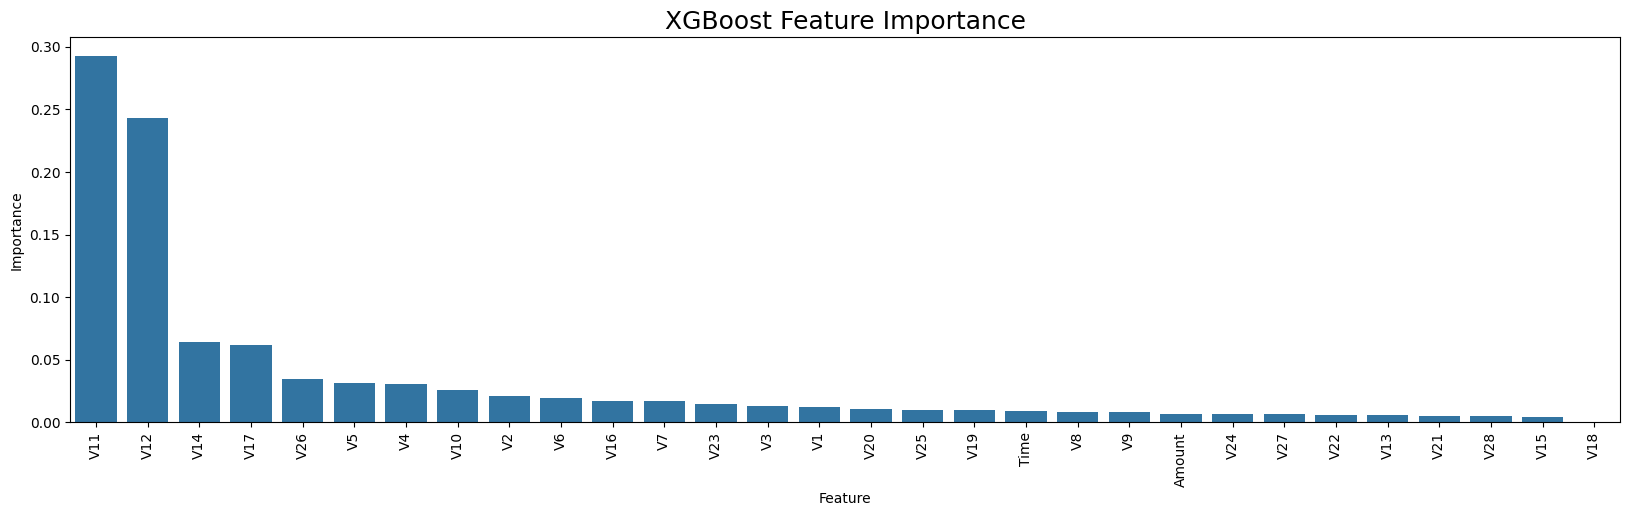

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have already fitted the model with RandomizedSearchCV or GridSearchCV
# random_search.fit(X_train_SKF_cv, y_train_SKF_cv)

# Extract the best model from the RandomizedSearchCV or GridSearchCV
best_xgb_model = random_search.best_estimator_

# Get feature importances from the best model
feature_importances = best_xgb_model.feature_importances_

# Get the feature names (assuming your features are in a DataFrame or you have named them)
feature_names = X.columns if hasattr(X, 'columns') else [f"Feature_{i}" for i in range(X.shape[1])]

# Create a DataFrame for plotting
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(20, 5))
sns.barplot(x='Feature', y='Importance', data=feature_importance_df)
plt.title("XGBoost Feature Importance", fontsize=18)
plt.xticks(rotation=90)
plt.show()


all have +ve importance above

oversampling with randomoversampler with stratified k fold cross validation

In [93]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)

# Loop through each fold
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Create training and testing sets based on the indices
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]

    # Initialize RandomOverSampler
    ROS = RandomOverSampler(sampling_strategy=0.5, random_state=None)

    # Apply oversampling on the training data
    X_over, y_over = ROS.fit_resample(X_train, y_train)

    # Convert the oversampled data to a DataFrame (optional)
    X_over = pd.DataFrame(data=X_over, columns=X.columns)

    # You can now use X_over and y_over for training your model in each fold
    # Example: model.fit(X_over, y_over)

    # Print or store the results of each fold as needed
    print(f"Fold {fold} - Number of samples after oversampling: {len(y_over)}")


Fold 1 - Number of samples after oversampling: 28522
Fold 2 - Number of samples after oversampling: 28522
Fold 3 - Number of samples after oversampling: 28522
Fold 4 - Number of samples after oversampling: 28522
Fold 5 - Number of samples after oversampling: 28524


In [101]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)

# Loop through each fold
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Create training and testing sets based on the indices
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]

    # Initialize RandomOverSampler
    ROS = RandomOverSampler(sampling_strategy=0.5, random_state=None)

    # Apply oversampling on the training data
    X_over, y_over = ROS.fit_resample(X_train, y_train)

    # Convert the oversampled data to a DataFrame (optional)
    X_over = pd.DataFrame(data=X_over, columns=X.columns)




In [103]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import StratifiedKFold

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)

# Placeholder for your functions
# Replace these with your actual implementations
def buildAndRunLogisticModels(df_results, method_name, X_train, y_train, X_test, y_test):
    # Dummy implementation: Replace with actual model training and result collection
    from sklearn.linear_model import LogisticRegression
    clf = LogisticRegression(penalty='l2', solver='liblinear')  # Example: L2 regularization
    clf.fit(X_train, y_train)
    y_pred_probs = clf.predict_proba(X_test)
    return pd.DataFrame({
        'coefficients': [clf.coef_],
        'predicted_probabilities': [y_pred_probs]
    })

def buildAndRunKNNModels(df_results, method_name, X_train, y_train, X_test, y_test):
    # Dummy implementation: Replace with actual model training and result collection
    pass

def buildAndRunTreeModels(df_results, method_name, X_train, y_train, X_test, y_test):
    # Dummy implementation: Replace with actual model training and result collection
    pass

def buildAndRunRandomForestModels(df_results, method_name, X_train, y_train, X_test, y_test):
    # Dummy implementation: Replace with actual model training and result collection
    pass

def buildAndRunXGBoostModels(df_results, method_name, X_train, y_train, X_test, y_test):
    # Dummy implementation: Replace with actual model training and result collection
    pass

# Define lists to store results for each fold
df_Results = pd.DataFrame()

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Create training and testing sets based on the indices
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]

    # Apply Random Oversampling
    ROS = RandomOverSampler(sampling_strategy=0.5, random_state=None)
    X_over, y_over = ROS.fit_resample(X_train, y_train)
    X_over = pd.DataFrame(data=X_over, columns=X.columns)  # Ensure column names are preserved

    # Run Logistic Regression with L1 and L2 Regularisation
    print("Logistic Regression with L1 and L2 Regularisation")
    start_time = time.time()
    df_Results = buildAndRunLogisticModels(df_Results, "Random Oversampling with StratifiedKFold",
                                           X_over, y_over, X_test, y_test)
    print(f"Time Taken by Model: {time.time() - start_time:.2f} seconds")
    print('*' * 60)

    # Check if df_Results contains results for Logistic Regression
    if df_Results is not None and 'coefficients' in df_Results.columns:
        coefficients = pd.concat([
            pd.DataFrame(X.columns, columns=['Feature']),
            pd.DataFrame(np.transpose(df_Results.loc[0, 'coefficients']), columns=['Coefficient'])
        ], axis=1)
        print("Logistic Regression Coefficients:")
        print(coefficients)
    else:
        print("No results found for Logistic Regression")

    # Run KNN Model
    print("KNN Model")
    start_time = time.time()
    df_Results = buildAndRunKNNModels(df_Results, "Random Oversampling with StratifiedKFold",
                                      X_over, y_over, X_test, y_test)
    print(f"Time Taken by Model: {time.time() - start_time:.2f} seconds")
    print('*' * 60)

    # Run Decision Tree Models with gini & entropy criteria
    print("Decision Tree Models with gini & entropy criteria")
    start_time = time.time()
    df_Results = buildAndRunTreeModels(df_Results, "Random Oversampling with StratifiedKFold",
                                       X_over, y_over, X_test, y_test)
    print(f"Time Taken by Model: {time.time() - start_time:.2f} seconds")
    print('*' * 60)

    # Run Random Forest Model
    print("Random Forest Model")
    start_time = time.time()
    df_Results = buildAndRunRandomForestModels(df_Results, "Random Oversampling with StratifiedKFold",
                                               X_over, y_over, X_test, y_test)
    print(f"Time Taken by Model: {time.time() - start_time:.2f} seconds")
    print('*' * 60)

    # Run XGBoost Model
    print("XGBoost Model")
    start_time = time.time()
    df_Results = buildAndRunXGBoostModels(df_Results, "Random Oversampling with StratifiedKFold",
                                          X_over, y_over, X_test, y_test)
    print(f"Time Taken by Model: {time.time() - start_time:.2f} seconds")
    print('*' * 60)

    # Plot ROC Curve for each model
    models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost']
    plt.figure(figsize=(12, 8))

    for model in models:
        if model in df_Results.index:  # Assuming df_Results uses model names as index
            y_pred_probs = df_Results.loc[model, 'predicted_probabilities'][:, 1]
            roc_auc = roc_auc_score(y_test, y_pred_probs)
            fpr, tpr, _ = roc_curve(y_test, y_pred_probs)

            plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.show()


Logistic Regression with L1 and L2 Regularisation
Time Taken by Model: 1.00 seconds
************************************************************
Logistic Regression Coefficients:
   Feature  Coefficient
0     Time    -0.000119
1       V1     0.164401
2       V2    -0.025118
3       V3    -0.336137
4       V4     0.601390
5       V5     0.014169
6       V6    -0.084785
7       V7     0.183609
8       V8    -0.189113
9       V9    -0.338703
10     V10     0.021598
11     V11    -0.069899
12     V12    -0.114375
13     V13    -0.369920
14     V14    -0.690353
15     V15    -0.031109
16     V16    -0.055550
17     V17    -0.167683
18     V18    -0.051519
19     V19    -0.212761
20     V20    -0.117038
21     V21     0.059239
22     V22     0.044195
23     V23     0.042800
24     V24     0.033491
25     V25    -0.057134
26     V26    -0.000354
27     V27    -0.151791
28     V28     0.028673
29  Amount    -0.002231
KNN Model
Time Taken by Model: 0.00 seconds
*********************************

AttributeError: 'NoneType' object has no attribute 'index'

<Figure size 1200x800 with 0 Axes>

In [109]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)

# Placeholder for your functions
def buildAndRunLogisticModels(df_results, method_name, X_train, y_train, X_test, y_test):
    clf = LogisticRegression(penalty='l2', solver='liblinear')
    clf.fit(X_train, y_train)
    y_pred_probs = clf.predict_proba(X_test)
    return pd.DataFrame({
        'Model': [method_name],
        'coefficients': [clf.coef_],
        'predicted_probabilities': [y_pred_probs]
    })

def buildAndRunKNNModels(df_results, method_name, X_train, y_train, X_test, y_test):
    clf = KNeighborsClassifier()
    clf.fit(X_train, y_train)
    y_pred_probs = clf.predict_proba(X_test)
    return pd.DataFrame({
        'Model': [method_name],
        'predicted_probabilities': [y_pred_probs]
    })

def buildAndRunTreeModels(df_results, method_name, X_train, y_train, X_test, y_test):
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred_probs = clf.predict_proba(X_test)
    return pd.DataFrame({
        'Model': [method_name],
        'predicted_probabilities': [y_pred_probs]
    })

def buildAndRunRandomForestModels(df_results, method_name, X_train, y_train, X_test, y_test):
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    y_pred_probs = clf.predict_proba(X_test)
    return pd.DataFrame({
        'Model': [method_name],
        'predicted_probabilities': [y_pred_probs]
    })

def buildAndRunXGBoostModels(df_results, method_name, X_train, y_train, X_test, y_test):
    clf = xgb.XGBClassifier()
    clf.fit(X_train, y_train)
    y_pred_probs = clf.predict_proba(X_test)
    return pd.DataFrame({
        'Model': [method_name],
        'predicted_probabilities': [y_pred_probs]
    })

# Define a DataFrame to store results
df_Results = pd.DataFrame()

# Apply StratifiedKFold and Random Oversampling
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    print(f"Processing Fold {fold}")

    # Create training and testing sets based on the indices
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]

    # Apply Random Oversampling
    ROS = RandomOverSampler(sampling_strategy=0.5, random_state=None)
    X_over, y_over = ROS.fit_resample(X_train, y_train)
    X_over = pd.DataFrame(data=X_over, columns=X.columns)  # Ensure column names are preserved

    # Run Logistic Regression with L1 and L2 Regularisation
    print("Logistic Regression with L1 and L2 Regularisation")
    start_time = time.time()
    df_Results = df_Results.append(buildAndRunLogisticModels(df_Results, "Logistic Regression",
                                                             X_over, y_over, X_test, y_test), ignore_index=True)
    print(f"Time Taken by Model: {time.time() - start_time:.2f} seconds")
    print('*' * 60)

    # Print Logistic Regression Coefficients
    logistic_results = df_Results[df_Results['Model'] == "Logistic Regression"]
    if not logistic_results.empty:
        coefficients = pd.concat([
            pd.DataFrame(X.columns, columns=['Feature']),
            pd.DataFrame(np.transpose(logistic_results['coefficients'].values[0]), columns=['Coefficient'])
        ], axis=1)
        print("Logistic Regression Coefficients:")
        print(coefficients)

        # Plot coefficients
        plt.figure(figsize=(12, 6))
        sns.barplot(x='Feature', y='Coefficient', data=coefficients)
        plt.xticks(rotation=90)
        plt.title('Logistic Regression Coefficients')
        plt.show()
    else:
        print("No results found for Logistic Regression")

    # Run KNN Model
    print("KNN Model")
    start_time = time.time()
    df_Results = df_Results.append(buildAndRunKNNModels(df_Results, "KNN",
                                                        X_over, y_over, X_test, y_test), ignore_index=True)
    print(f"Time Taken by Model: {time.time() - start_time:.2f} seconds")
    print('*' * 60)

    # Run Decision Tree Models with gini & entropy criteria
    print("Decision Tree Models with gini & entropy criteria")
    start_time = time.time()
    df_Results = df_Results.append(buildAndRunTreeModels(df_Results, "Decision Tree",
                                                         X_over, y_over, X_test, y_test), ignore_index=True)
    print(f"Time Taken by Model: {time.time() - start_time:.2f} seconds")
    print('*' * 60)

    # Run Random Forest Model
    print("Random Forest Model")
    start_time = time.time()
    df_Results = df_Results.append(buildAndRunRandomForestModels(df_Results, "Random Forest",
                                                                 X_over, y_over, X_test, y_test), ignore_index=True)
    print(f"Time Taken by Model: {time.time() - start_time:.2f} seconds")
    print('*' * 60)

    # Run XGBoost Model
    print("XGBoost Model")
    start_time = time.time()
    df_Results = df_Results.append(buildAndRunXGBoostModels(df_Results, "XGBoost",
                                                            X_over, y_over, X_test, y_test), ignore_index=True)
    print(f"Time Taken by Model: {time.time() - start_time:.2f} seconds")
    print('*' * 60)

# Plot ROC Curves for All Models
plt.figure(figsize=(12, 8))

for model in df_Results['Model'].unique():
    model_results = df_Results[df_Results['Model'] == model]
    if not model_results.empty:
        y_pred_probs = model_results['predicted_probabilities'].values[0][:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_probs)
        fpr, tpr, _ = roc_curve(y_test, y_pred_probs)

        plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


Processing Fold 1
Logistic Regression with L1 and L2 Regularisation


AttributeError: 'DataFrame' object has no attribute 'append'

In [119]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
import numpy as np
import pandas as pd

# Define your StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=True)

# Define the RandomOverSampler
ros = RandomOverSampler(sampling_strategy=0.5)

# Loop through each fold
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Split the data into training and testing sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Apply RandomOverSampler to the training set
    X_over, y_over = ros.fit_resample(X_train, y_train)

    # Optionally convert the oversampled data into a DataFrame if needed
    # You need to define the column names if you convert back to DataFrame
    # X_over_df = pd.DataFrame(data=X_over, columns=[...])  # Replace with actual column names if needed
    X_over = pd.DataFrame(data=X_over,columns = cols)





ValueError: Shape of passed values is (1080, 20), indices imply (1080, 30)

Logistic Regression (L1) Model score: 0.915
Confusion Matrix
 [[128  12]
 [  5  55]]
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.91      0.94       140
           1       0.82      0.92      0.87        60

    accuracy                           0.92       200
   macro avg       0.89      0.92      0.90       200
weighted avg       0.92      0.92      0.92       200

Logistic Regression (L1) ROC AUC value: 0.9545238095238096
Logistic Regression (L1) Optimal Threshold: 0.3771019110398301
ROC AUC for the test dataset (L1): 0.9545238095238096


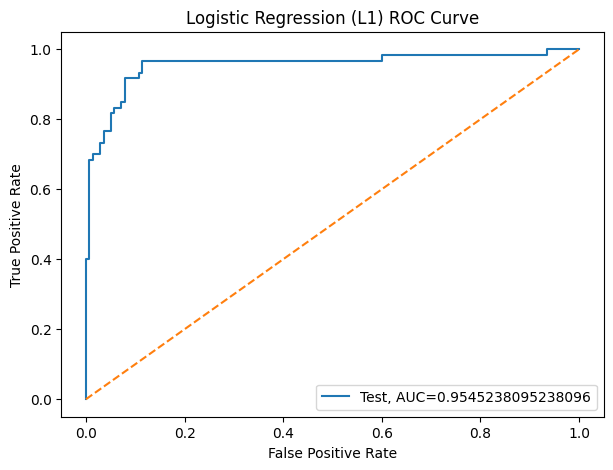

<ipython-input-4-febcc875684e>:68: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_Results = pd.concat([df_Results, new_results], ignore_index=True)


Logistic Regression (L2) Model score: 0.915
Confusion Matrix
 [[128  12]
 [  5  55]]
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.91      0.94       140
           1       0.82      0.92      0.87        60

    accuracy                           0.92       200
   macro avg       0.89      0.92      0.90       200
weighted avg       0.92      0.92      0.92       200

Logistic Regression (L2) ROC AUC value: 0.9538095238095237
Logistic Regression (L2) Optimal Threshold: 0.37925273961650946
ROC AUC for the test dataset (L2): 0.9538095238095237


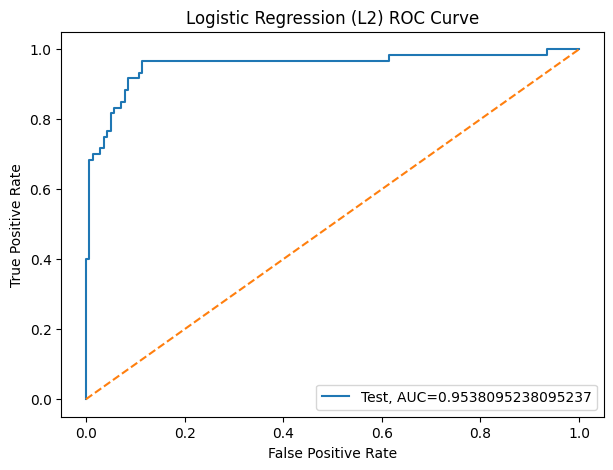

KNN Model score: 0.835
Confusion Matrix
 [[118  22]
 [ 11  49]]
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.84      0.88       140
           1       0.69      0.82      0.75        60

    accuracy                           0.83       200
   macro avg       0.80      0.83      0.81       200
weighted avg       0.85      0.83      0.84       200

KNN ROC AUC value: 0.8941071428571428
KNN Optimal Threshold: 0.6
ROC AUC for the test dataset: 0.8941071428571428


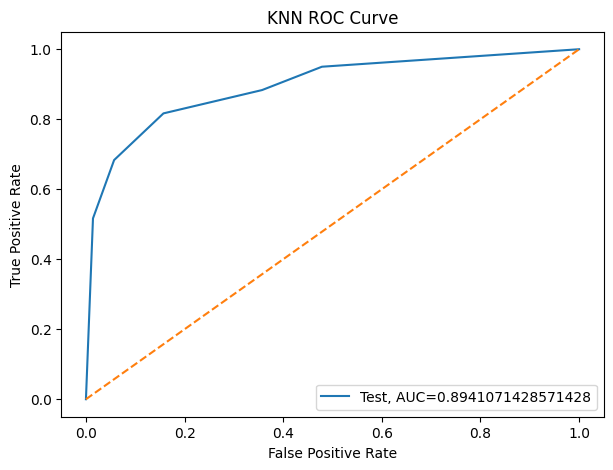

Decision Tree (gini) Model score: 0.895
Confusion Matrix
 [[131   9]
 [ 12  48]]
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       140
           1       0.84      0.80      0.82        60

    accuracy                           0.90       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.89      0.90      0.89       200

Decision Tree (gini) ROC AUC value: 0.8678571428571429
Decision Tree (gini) Optimal Threshold: 1.0
ROC AUC for the test dataset (gini): 0.8678571428571429


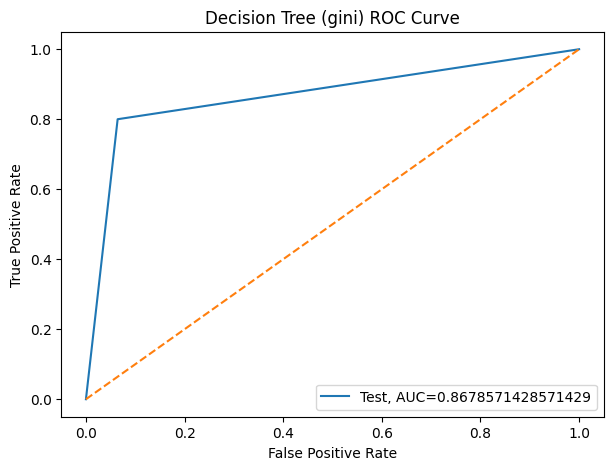

Decision Tree (entropy) Model score: 0.915
Confusion Matrix
 [[135   5]
 [ 12  48]]
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       140
           1       0.91      0.80      0.85        60

    accuracy                           0.92       200
   macro avg       0.91      0.88      0.90       200
weighted avg       0.91      0.92      0.91       200

Decision Tree (entropy) ROC AUC value: 0.8821428571428571
Decision Tree (entropy) Optimal Threshold: 1.0
ROC AUC for the test dataset (entropy): 0.8821428571428571


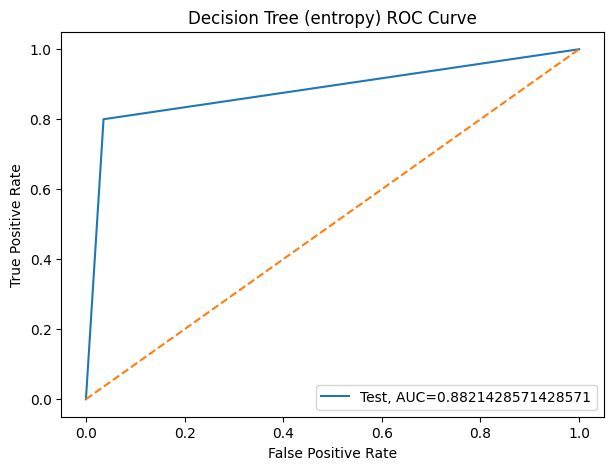

Random Forest Model score: 0.955
Confusion Matrix
 [[137   3]
 [  6  54]]
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       140
           1       0.95      0.90      0.92        60

    accuracy                           0.95       200
   macro avg       0.95      0.94      0.95       200
weighted avg       0.95      0.95      0.95       200

Random Forest ROC AUC value: 0.9736309523809523
Random Forest Optimal Threshold: 0.44
ROC AUC for the test dataset: 0.9736309523809523


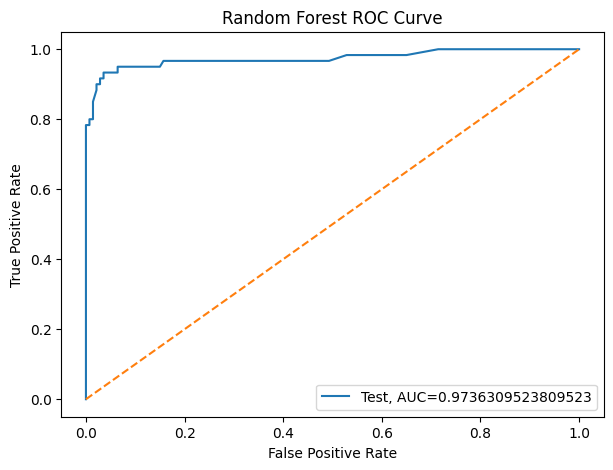

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:12:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model score: 0.94
Confusion Matrix
 [[139   1]
 [ 11  49]]
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       140
           1       0.98      0.82      0.89        60

    accuracy                           0.94       200
   macro avg       0.95      0.90      0.92       200
weighted avg       0.94      0.94      0.94       200

XGBoost ROC AUC value: 0.9745238095238096
XGBoost Optimal Threshold: 0.08383347
ROC AUC for the test dataset: 0.9745238095238096


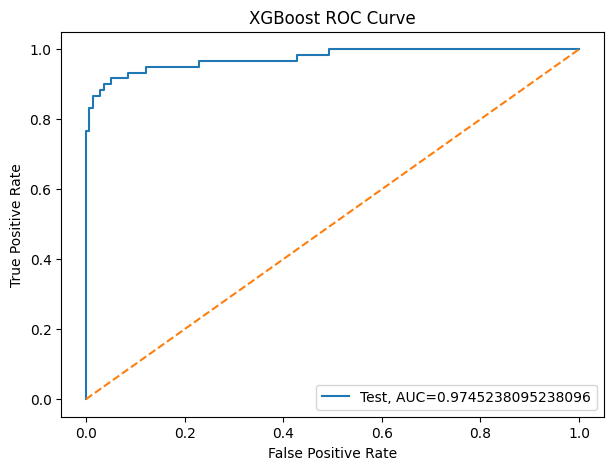

Final Results:
                                    Methodology                     Model  \
0  Random Oversampling with StratifiedKFold CV  Logistic Regression (L1)   
1  Random Oversampling with StratifiedKFold CV  Logistic Regression (L2)   
2  Random Oversampling with StratifiedKFold CV                       KNN   
3  Random Oversampling with StratifiedKFold CV      Decision Tree (gini)   
4  Random Oversampling with StratifiedKFold CV   Decision Tree (entropy)   
5  Random Oversampling with StratifiedKFold CV             Random Forest   
6  Random Oversampling with StratifiedKFold CV                   XGBoost   

   Accuracy   ROC AUC  
0     0.915  0.954524  
1     0.915  0.953810  
2     0.835  0.894107  
3     0.895  0.867857  
4     0.915  0.882143  
5     0.955  0.973631  
6     0.940  0.974524  


In [4]:
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset (Replace 'your_data.csv' with your actual data file)
# df = pd.read_csv('your_data.csv')

# Assuming the dataset is loaded as a DataFrame 'df'
# Example: Assume the last column is the target and the rest are features
# X = df.iloc[:, :-1].values
# y = df.iloc[:, -1].values

# Example dataset creation (Remove this part if you load your actual dataset)
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.7, 0.3], random_state=42)

# Function for Logistic Regression with L1 and L2 regularization
def buildAndRunLogisticModels(df_Results, Methodology, X_over, y_over, X_test, y_test):
    for penalty in ['l1', 'l2']:
        model = LogisticRegression(penalty=penalty, solver='liblinear')
        model.fit(X_over, y_over)
        y_pred = model.predict(X_test)

        # Metrics
        accuracy = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        cr = classification_report(y_test, y_pred)
        probs = model.predict_proba(X_test)[:, 1]
        roc_value = roc_auc_score(y_test, probs)
        fpr, tpr, thresholds = roc_curve(y_test, probs)
        optimal_idx = np.argmax(tpr - fpr)
        optimal_threshold = thresholds[optimal_idx]
        roc_auc_value = auc(fpr, tpr)

        print(f"Logistic Regression ({penalty.upper()}) Model score:", accuracy)
        print("Confusion Matrix\n", cm)
        print("Classification Report\n", cr)
        print(f"Logistic Regression ({penalty.upper()}) ROC AUC value:", roc_value)
        print(f"Logistic Regression ({penalty.upper()}) Optimal Threshold:", optimal_threshold)
        print(f"ROC AUC for the test dataset ({penalty.upper()}):", roc_auc_value)

        # Plot ROC Curve
        plt.figure(figsize=(7, 5))
        plt.plot(fpr, tpr, label=f"Test, AUC={roc_auc_value}")
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.title(f'Logistic Regression ({penalty.upper()}) ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.show()

        # Save Results
        new_results = pd.DataFrame({
            'Methodology': [Methodology],
            'Model': [f'Logistic Regression ({penalty.upper()})'],
            'Accuracy': [accuracy],
            'ROC AUC': [roc_value]
        })
        df_Results = pd.concat([df_Results, new_results], ignore_index=True)
    return df_Results

# Function for KNN Model
def buildAndRunKNNModels(df_Results, Methodology, X_over, y_over, X_test, y_test):
    model = KNeighborsClassifier()
    model.fit(X_over, y_over)
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    probs = model.predict_proba(X_test)[:, 1]
    roc_value = roc_auc_score(y_test, probs)
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    roc_auc_value = auc(fpr, tpr)

    print("KNN Model score:", accuracy)
    print("Confusion Matrix\n", cm)
    print("Classification Report\n", cr)
    print("KNN ROC AUC value:", roc_value)
    print("KNN Optimal Threshold:", optimal_threshold)
    print("ROC AUC for the test dataset:", roc_auc_value)

    # Plot ROC Curve
    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, label=f"Test, AUC={roc_auc_value}")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title('KNN ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

    # Save Results
    new_results = pd.DataFrame({
        'Methodology': [Methodology],
        'Model': ['KNN'],
        'Accuracy': [accuracy],
        'ROC AUC': [roc_value]
    })
    df_Results = pd.concat([df_Results, new_results], ignore_index=True)
    return df_Results

# Function for Decision Tree Model
def buildAndRunTreeModels(df_Results, Methodology, X_over, y_over, X_test, y_test):
    for criterion in ['gini', 'entropy']:
        model = DecisionTreeClassifier(criterion=criterion)
        model.fit(X_over, y_over)
        y_pred = model.predict(X_test)

        # Metrics
        accuracy = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        cr = classification_report(y_test, y_pred)
        probs = model.predict_proba(X_test)[:, 1]
        roc_value = roc_auc_score(y_test, probs)
        fpr, tpr, thresholds = roc_curve(y_test, probs)
        optimal_idx = np.argmax(tpr - fpr)
        optimal_threshold = thresholds[optimal_idx]
        roc_auc_value = auc(fpr, tpr)

        print(f"Decision Tree ({criterion}) Model score:", accuracy)
        print("Confusion Matrix\n", cm)
        print("Classification Report\n", cr)
        print(f"Decision Tree ({criterion}) ROC AUC value:", roc_value)
        print(f"Decision Tree ({criterion}) Optimal Threshold:", optimal_threshold)
        print(f"ROC AUC for the test dataset ({criterion}):", roc_auc_value)

        # Plot ROC Curve
        plt.figure(figsize=(7, 5))
        plt.plot(fpr, tpr, label=f"Test, AUC={roc_auc_value}")
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.title(f'Decision Tree ({criterion}) ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.show()

        # Save Results
        new_results = pd.DataFrame({
            'Methodology': [Methodology],
            'Model': [f'Decision Tree ({criterion})'],
            'Accuracy': [accuracy],
            'ROC AUC': [roc_value]
        })
        df_Results = pd.concat([df_Results, new_results], ignore_index=True)
    return df_Results

# Function for Random Forest Model
def buildAndRunRandomForestModels(df_Results, Methodology, X_over, y_over, X_test, y_test):
    model = RandomForestClassifier()
    model.fit(X_over, y_over)
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    probs = model.predict_proba(X_test)[:, 1]
    roc_value = roc_auc_score(y_test, probs)
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    roc_auc_value = auc(fpr, tpr)

    print("Random Forest Model score:", accuracy)
    print("Confusion Matrix\n", cm)
    print("Classification Report\n", cr)
    print("Random Forest ROC AUC value:", roc_value)
    print("Random Forest Optimal Threshold:", optimal_threshold)
    print("ROC AUC for the test dataset:", roc_auc_value)

    # Plot ROC Curve
    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, label=f"Test, AUC={roc_auc_value}")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title('Random Forest ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

    # Save Results
    new_results = pd.DataFrame({
        'Methodology': [Methodology],
        'Model': ['Random Forest'],
        'Accuracy': [accuracy],
        'ROC AUC': [roc_value]
    })
    df_Results = pd.concat([df_Results, new_results], ignore_index=True)
    return df_Results

# Function for XGBoost Model
def buildAndRunXGBoostModels(df_Results, Methodology, X_over, y_over, X_test, y_test):
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model.fit(X_over, y_over)
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    probs = model.predict_proba(X_test)[:, 1]
    roc_value = roc_auc_score(y_test, probs)
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    roc_auc_value = auc(fpr, tpr)

    print("XGBoost Model score:", accuracy)
    print("Confusion Matrix\n", cm)
    print("Classification Report\n", cr)
    print("XGBoost ROC AUC value:", roc_value)
    print("XGBoost Optimal Threshold:", optimal_threshold)
    print("ROC AUC for the test dataset:", roc_auc_value)

    # Plot ROC Curve
    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, label=f"Test, AUC={roc_auc_value}")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title('XGBoost ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

    # Save Results
    new_results = pd.DataFrame({
        'Methodology': [Methodology],
        'Model': ['XGBoost'],
        'Accuracy': [accuracy],
        'ROC AUC': [roc_value]
    })
    df_Results = pd.concat([df_Results, new_results], ignore_index=True)
    return df_Results

# Main Script

# Assuming df_Results is your results DataFrame and X, y are your original data
df_Results = pd.DataFrame(columns=['Methodology', 'Model', 'Accuracy', 'ROC AUC'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Apply oversampling to the training data
X_over, y_over = ros.fit_resample(X_train, y_train)

# Train and evaluate models
df_Results = buildAndRunLogisticModels(df_Results, "Random Oversampling with StratifiedKFold CV", X_over, y_over, X_test, y_test)
df_Results = buildAndRunKNNModels(df_Results, "Random Oversampling with StratifiedKFold CV", X_over, y_over, X_test, y_test)
df_Results = buildAndRunTreeModels(df_Results, "Random Oversampling with StratifiedKFold CV", X_over, y_over, X_test, y_test)
df_Results = buildAndRunRandomForestModels(df_Results, "Random Oversampling with StratifiedKFold CV", X_over, y_over, X_test, y_test)
df_Results = buildAndRunXGBoostModels(df_Results, "Random Oversampling with StratifiedKFold CV", X_over, y_over, X_test, y_test)

# Final results
print("Final Results:\n", df_Results)


In [5]:
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Example dataset creation (Replace this part with your actual data loading code)
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.7, 0.3], random_state=42)

# Function for Logistic Regression with L1 and L2 regularization
def buildAndRunLogisticModels(df_Results, Methodology, X_over, y_over, X_test, y_test):
    for penalty in ['l1', 'l2']:
        model = LogisticRegression(penalty=penalty, solver='liblinear')
        model.fit(X_over, y_over)
        y_pred = model.predict(X_test)

        # Metrics
        accuracy = accuracy_score(y_test, y_pred)
        probs = model.predict_proba(X_test)[:, 1]
        roc_value = roc_auc_score(y_test, probs)

        print(f"Logistic Regression ({penalty.upper()}) Model score:", accuracy)
        print(f"Logistic Regression ({penalty.upper()}) ROC AUC value:", roc_value)

        # Save Results
        new_results = pd.DataFrame({
            'Methodology': [Methodology],
            'Model': [f'Logistic Regression ({penalty.upper()})'],
            'Accuracy': [accuracy],
            'ROC AUC': [roc_value]
        })
        df_Results = pd.concat([df_Results, new_results], ignore_index=True)
    return df_Results

# Function for KNN Model
def buildAndRunKNNModels(df_Results, Methodology, X_over, y_over, X_test, y_test):
    model = KNeighborsClassifier()
    model.fit(X_over, y_over)
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    probs = model.predict_proba(X_test)[:, 1]
    roc_value = roc_auc_score(y_test, probs)

    print("KNN Model score:", accuracy)
    print("KNN ROC AUC value:", roc_value)

    # Save Results
    new_results = pd.DataFrame({
        'Methodology': [Methodology],
        'Model': ['KNN'],
        'Accuracy': [accuracy],
        'ROC AUC': [roc_value]
    })
    df_Results = pd.concat([df_Results, new_results], ignore_index=True)
    return df_Results

# Function for Decision Tree Model
def buildAndRunTreeModels(df_Results, Methodology, X_over, y_over, X_test, y_test):
    for criterion in ['gini', 'entropy']:
        model = DecisionTreeClassifier(criterion=criterion)
        model.fit(X_over, y_over)
        y_pred = model.predict(X_test)

        # Metrics
        accuracy = accuracy_score(y_test, y_pred)
        probs = model.predict_proba(X_test)[:, 1]
        roc_value = roc_auc_score(y_test, probs)

        print(f"Decision Tree ({criterion}) Model score:", accuracy)
        print(f"Decision Tree ({criterion}) ROC AUC value:", roc_value)

        # Save Results
        new_results = pd.DataFrame({
            'Methodology': [Methodology],
            'Model': [f'Decision Tree ({criterion})'],
            'Accuracy': [accuracy],
            'ROC AUC': [roc_value]
        })
        df_Results = pd.concat([df_Results, new_results], ignore_index=True)
    return df_Results

# Function for Random Forest Model
def buildAndRunRandomForestModels(df_Results, Methodology, X_over, y_over, X_test, y_test):
    model = RandomForestClassifier()
    model.fit(X_over, y_over)
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    probs = model.predict_proba(X_test)[:, 1]
    roc_value = roc_auc_score(y_test, probs)

    print("Random Forest Model score:", accuracy)
    print("Random Forest ROC AUC value:", roc_value)

    # Save Results
    new_results = pd.DataFrame({
        'Methodology': [Methodology],
        'Model': ['Random Forest'],
        'Accuracy': [accuracy],
        'ROC AUC': [roc_value]
    })
    df_Results = pd.concat([df_Results, new_results], ignore_index=True)
    return df_Results

# Function for XGBoost Model
def buildAndRunXGBoostModels(df_Results, Methodology, X_over, y_over, X_test, y_test):
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model.fit(X_over, y_over)
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    probs = model.predict_proba(X_test)[:, 1]
    roc_value = roc_auc_score(y_test, probs)

    print("XGBoost Model score:", accuracy)
    print("XGBoost ROC AUC value:", roc_value)

    # Save Results
    new_results = pd.DataFrame({
        'Methodology': [Methodology],
        'Model': ['XGBoost'],
        'Accuracy': [accuracy],
        'ROC AUC': [roc_value]
    })
    df_Results = pd.concat([df_Results, new_results], ignore_index=True)
    return df_Results

# Main Script

# Assuming df_Results is your results DataFrame and X, y are your original data
df_Results = pd.DataFrame(columns=['Methodology', 'Model', 'Accuracy', 'ROC AUC'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Apply oversampling to the training data
X_over, y_over = ros.fit_resample(X_train, y_train)

# Train and evaluate models
df_Results = buildAndRunLogisticModels(df_Results, "Random Oversampling with StratifiedKFold CV", X_over, y_over, X_test, y_test)
df_Results = buildAndRunKNNModels(df_Results, "Random Oversampling with StratifiedKFold CV", X_over, y_over, X_test, y_test)
df_Results = buildAndRunTreeModels(df_Results, "Random Oversampling with StratifiedKFold CV", X_over, y_over, X_test, y_test)
df_Results = buildAndRunRandomForestModels(df_Results, "Random Oversampling with StratifiedKFold CV", X_over, y_over, X_test, y_test)
df_Results = buildAndRunXGBoostModels(df_Results, "Random Oversampling with StratifiedKFold CV", X_over, y_over, X_test, y_test)

# Final results
print("Final Results:\n", df_Results)

# Identify the best model based on Accuracy and ROC AUC
best_model_accuracy = df_Results.loc[df_Results['Accuracy'].idxmax()]
best_model_roc_auc = df_Results.loc[df_Results['ROC AUC'].idxmax()]

print("\nBest Model Based on Accuracy:")
print(best_model_accuracy)

print("\nBest Model Based on ROC AUC:")
print(best_model_roc_auc)


Logistic Regression (L1) Model score: 0.915
Logistic Regression (L1) ROC AUC value: 0.9545238095238096
Logistic Regression (L2) Model score: 0.915
Logistic Regression (L2) ROC AUC value: 0.9538095238095237
KNN Model score: 0.835
KNN ROC AUC value: 0.8941071428571428
Decision Tree (gini) Model score: 0.915
Decision Tree (gini) ROC AUC value: 0.8869047619047619
Decision Tree (entropy) Model score: 0.895
Decision Tree (entropy) ROC AUC value: 0.8583333333333333


<ipython-input-5-ccc47ad07dae>:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_Results = pd.concat([df_Results, new_results], ignore_index=True)


Random Forest Model score: 0.95
Random Forest ROC AUC value: 0.9713690476190476


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:14:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model score: 0.94
XGBoost ROC AUC value: 0.9745238095238096
Final Results:
                                    Methodology                     Model  \
0  Random Oversampling with StratifiedKFold CV  Logistic Regression (L1)   
1  Random Oversampling with StratifiedKFold CV  Logistic Regression (L2)   
2  Random Oversampling with StratifiedKFold CV                       KNN   
3  Random Oversampling with StratifiedKFold CV      Decision Tree (gini)   
4  Random Oversampling with StratifiedKFold CV   Decision Tree (entropy)   
5  Random Oversampling with StratifiedKFold CV             Random Forest   
6  Random Oversampling with StratifiedKFold CV                   XGBoost   

   Accuracy   ROC AUC  
0     0.915  0.954524  
1     0.915  0.953810  
2     0.835  0.894107  
3     0.915  0.886905  
4     0.895  0.858333  
5     0.950  0.971369  
6     0.940  0.974524  

Best Model Based on Accuracy:
Methodology    Random Oversampling with StratifiedKFold CV
Model                    

In [7]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define the parameter grid
param_test = {
    'max_depth': range(3, 10, 2),
    'min_child_weight': range(1, 6, 2),
    'n_estimators': range(60, 130, 10),  # Corrected range step from 150 to 10
    'learning_rate': [0.05, 0.1, 0.125, 0.15, 0.2],
    'gamma': [i/10.0 for i in range(0, 5)],
    'subsample': [i/10.0 for i in range(7, 10)],
    'colsample_bytree': [i/10.0 for i in range(7, 10)]
}

# Initialize the XGBClassifier
xgb = XGBClassifier(
    base_score=0.5,
    booster='gbtree',
    colsample_bylevel=1,
    colsample_bynode=1,
    max_delta_step=0,
    nthread=None,
    objective='binary:logistic',
    random_state=42,
    missing=None,
    n_jobs=-1,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    seed=None,
    silent=None,
    verbosity=1
)

# Set up the RandomizedSearchCV
gsearch1 = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_test,
    n_iter=5,
    scoring='roc_auc',
    n_jobs=-1,
    cv=5,
    random_state=42  # Added for reproducibility
)

# Fit the model
gsearch1.fit(X_over, y_over)

# Extracting results
cv_results = gsearch1.cv_results_
best_params = gsearch1.best_params_
best_score = gsearch1.best_score_

print("CV Results:", cv_results)
print("Best Parameters:", best_params)
print("Best Score:", best_score)


CV Results: {'mean_fit_time': array([0.170327  , 0.29096737, 0.24233308, 0.23174229, 0.25230875]), 'std_fit_time': array([0.04936797, 0.08274599, 0.05823832, 0.06057994, 0.05668412]), 'mean_score_time': array([0.00578637, 0.0073534 , 0.00374241, 0.0075458 , 0.00480452]), 'std_score_time': array([0.00316127, 0.00486204, 0.00034307, 0.00484788, 0.00298233]), 'param_subsample': masked_array(data=[0.7, 0.9, 0.9, 0.7, 0.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[70, 120, 100, 110, 80],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 3, 3, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[7, 5, 5, 5, 9],
             mask=[False, False, False, False, False],
       fill_value='?',
    

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


In [9]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np

# Create the XGBoost model with selected hyperparameters
clf = XGBClassifier(
    base_score=0.5,
    booster='gbtree',
    colsample_bylevel=1,
    colsample_bynode=1,
    colsample_bytree=0.7,
    gamma=0.2,
    learning_rate=0.125,
    max_delta_step=0,
    max_depth=7,
    min_child_weight=5,
    n_estimators=60,
    n_jobs=1,
    objective='binary:logistic',
    random_state=42,
    reg_alpha=1,  # Corrected from 'e' to '1'
    reg_lambda=1,
    scale_pos_weight=1,
    subsample=0.8,
    verbosity=1
)

# Fit the model on the training dataset
clf.fit(X_over, y_over)

# Evaluate the model on the test dataset
XGB_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {:.4f}'.format(XGB_test_score))

# Predict probabilities for each class
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
XGB_roc_value = roc_auc_score(y_test, XGB_probs)
print("XGBoost ROC AUC Value: {:.4f}".format(XGB_roc_value))

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, XGB_probs)

# Find the threshold that maximizes the difference between TPR and FPR
threshold = thresholds[np.argmax(tpr - fpr)]
print("XGBoost Optimal Threshold: {:.4f}".format(threshold))


Model Accuracy: 0.9500
XGBoost ROC AUC Value: 0.9787
XGBoost Optimal Threshold: 0.3851


print the important fearures of the best modek to understand the dataset

In [10]:
# Assuming `clf` is your trained XGBClassifier model
import numpy as np

# Get the feature importances from the model
feature_importances = clf.feature_importances_

# Sort the features by importance
sorted_indices = np.argsort(feature_importances)[::-1]  # Sort in descending order

# Print the top 3 important features
print("Top 1 Feature: Index = {}, Importance = {:.4f}".format(sorted_indices[0], feature_importances[sorted_indices[0]]))
print("Top 2 Feature: Index = {}, Importance = {:.4f}".format(sorted_indices[1], feature_importances[sorted_indices[1]]))
print("Top 3 Feature: Index = {}, Importance = {:.4f}".format(sorted_indices[2], feature_importances[sorted_indices[2]]))

# Optional: if you have feature names instead of just indices
if hasattr(X_over, 'columns'):
    feature_names = X_over.columns
    print("Top 1 Feature Name: {}, Importance = {:.4f}".format(feature_names[sorted_indices[0]], feature_importances[sorted_indices[0]]))
    print("Top 2 Feature Name: {}, Importance = {:.4f}".format(feature_names[sorted_indices[1]], feature_importances[sorted_indices[1]]))
    print("Top 3 Feature Name: {}, Importance = {:.4f}".format(feature_names[sorted_indices[2]], feature_importances[sorted_indices[2]]))


Top 1 Feature: Index = 5, Importance = 0.2931
Top 2 Feature: Index = 18, Importance = 0.2036
Top 3 Feature: Index = 1, Importance = 0.0830


In [11]:
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np

# Assuming y_test contains the true labels and XGB_probs contains the predicted probabilities

# Calculate ROC AUC score
XGB_roc_value = roc_auc_score(y_test, XGB_probs)
print("XGBoost ROC AUC Value: {:.5f}".format(XGB_roc_value))

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, XGB_probs)

# Find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("XGBoost Optimal Threshold: {:.8f}".format(optimal_threshold))


XGBoost ROC AUC Value: 0.97869
XGBoost Optimal Threshold: 0.38511431
